## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Don't run below code in Google Colab!**

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

**Mount the Google Drive folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UT Austin AI Course/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

### Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

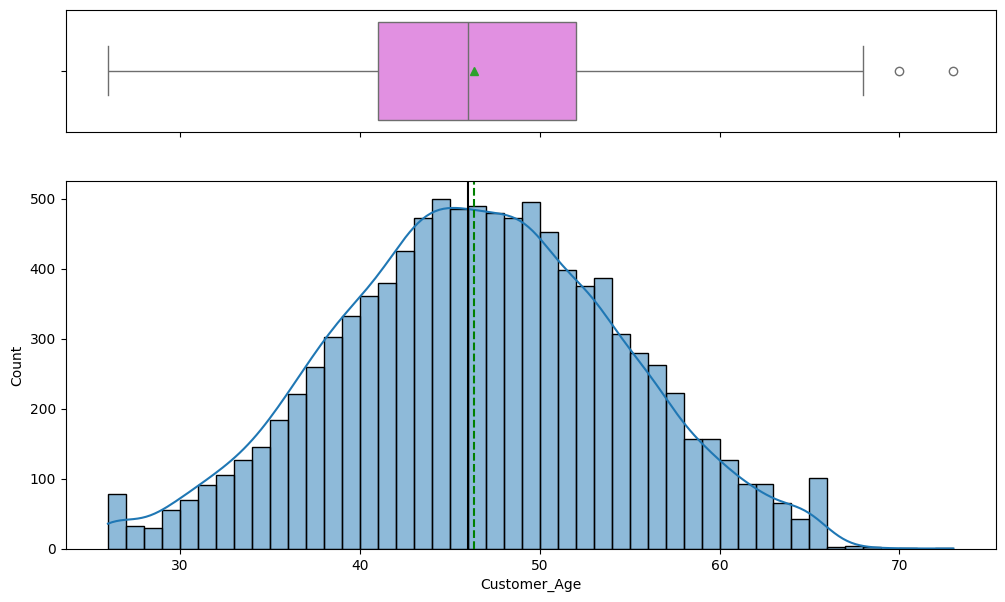

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

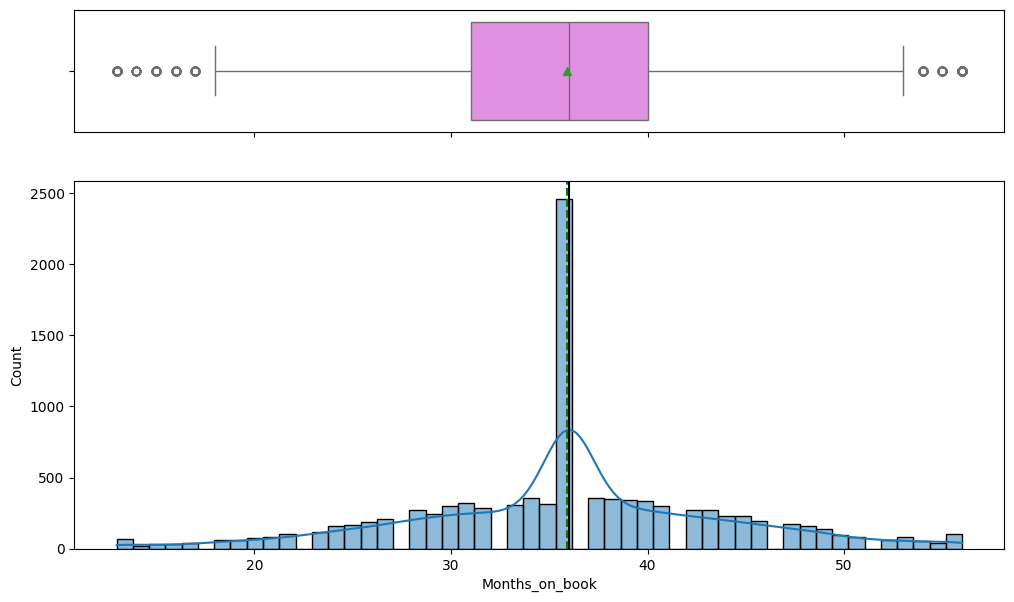

In [ ]:
histogram_boxplot(data, "Months_on_book", kde=True)

`Credit_Limit`

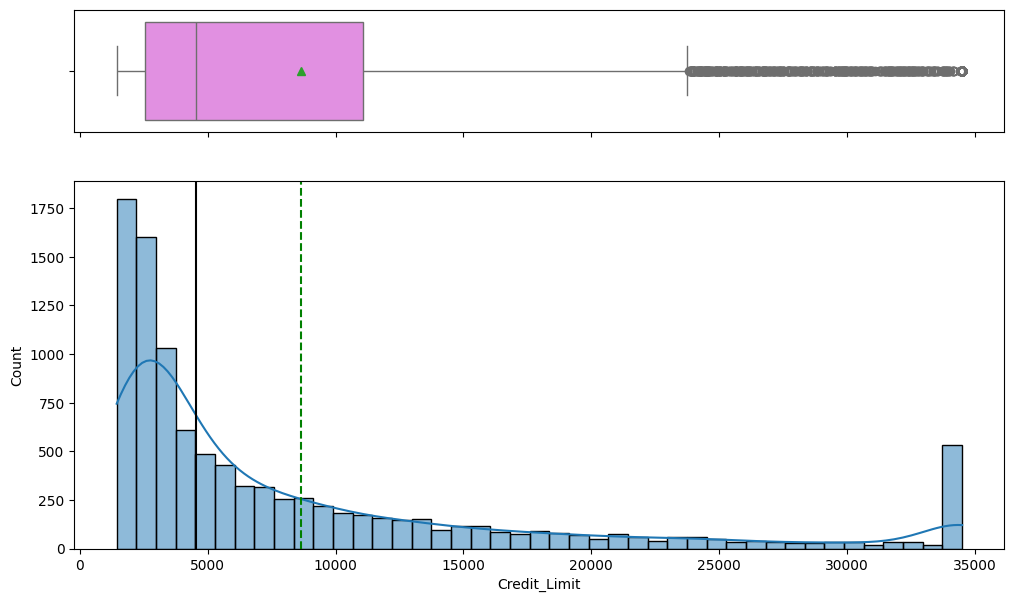

In [ ]:
histogram_boxplot(data, "Credit_Limit", kde=True)

`Total_Revolving_Bal`

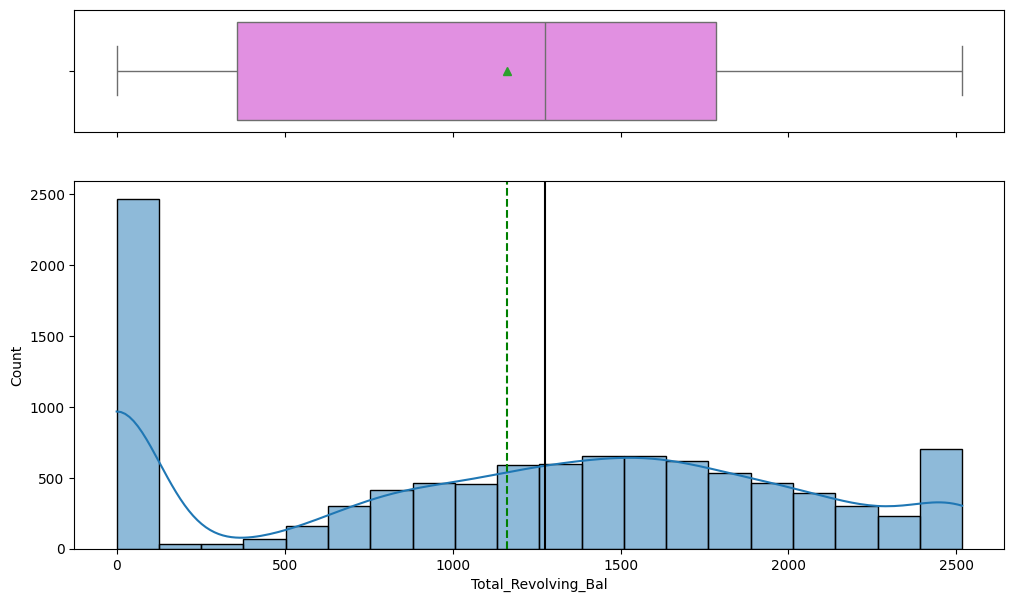

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

`Avg_Open_To_Buy`

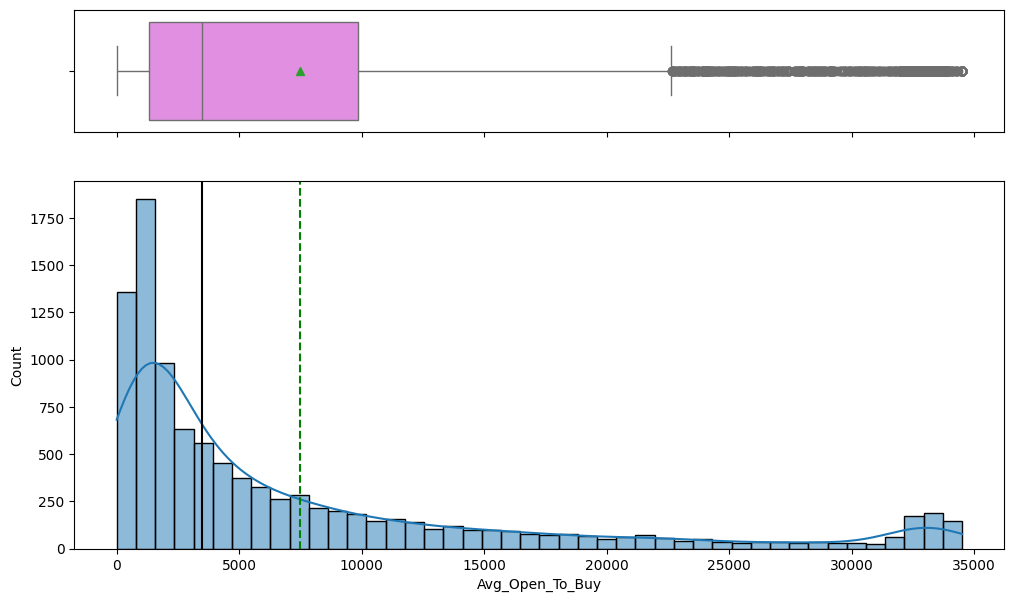

In [ ]:
histogram_boxplot(data, 'Avg_Open_To_Buy', kde=True)

`Total_Trans_Ct`

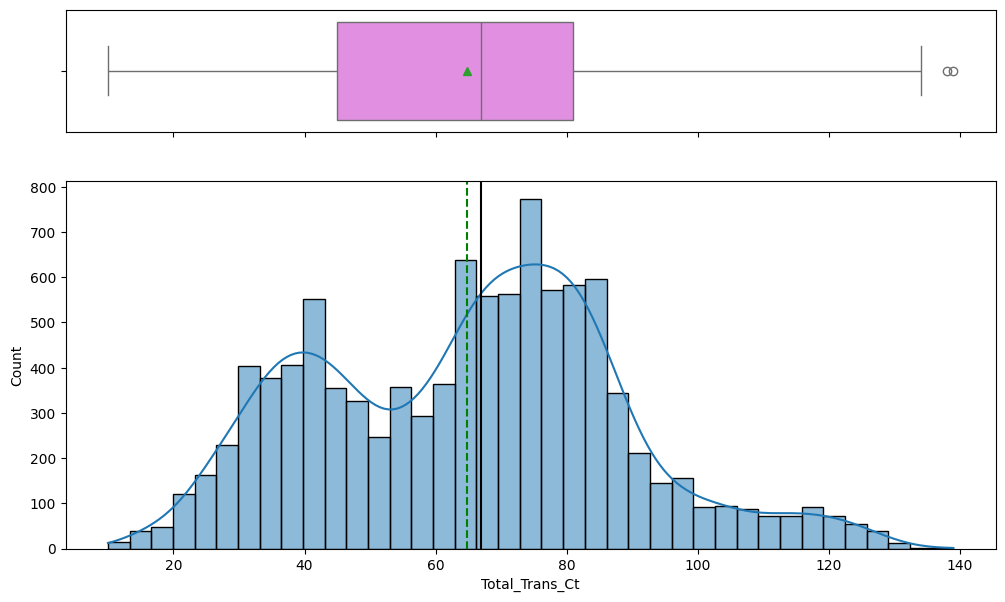

In [ ]:
histogram_boxplot(data, 'Total_Trans_Ct', kde=True)

`Total_Amt_Chng_Q4_Q1`

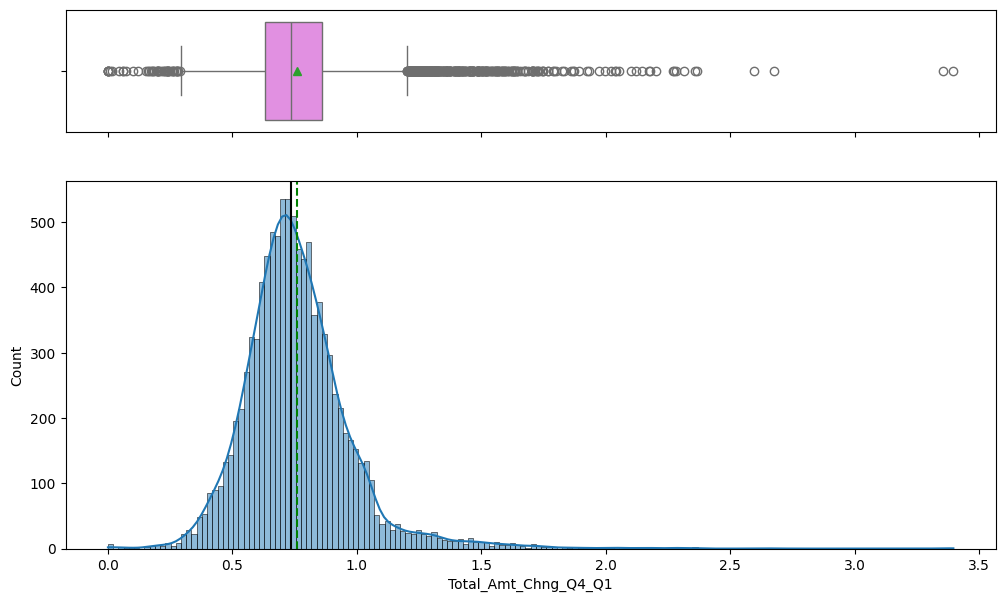

In [ ]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', kde=True)

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

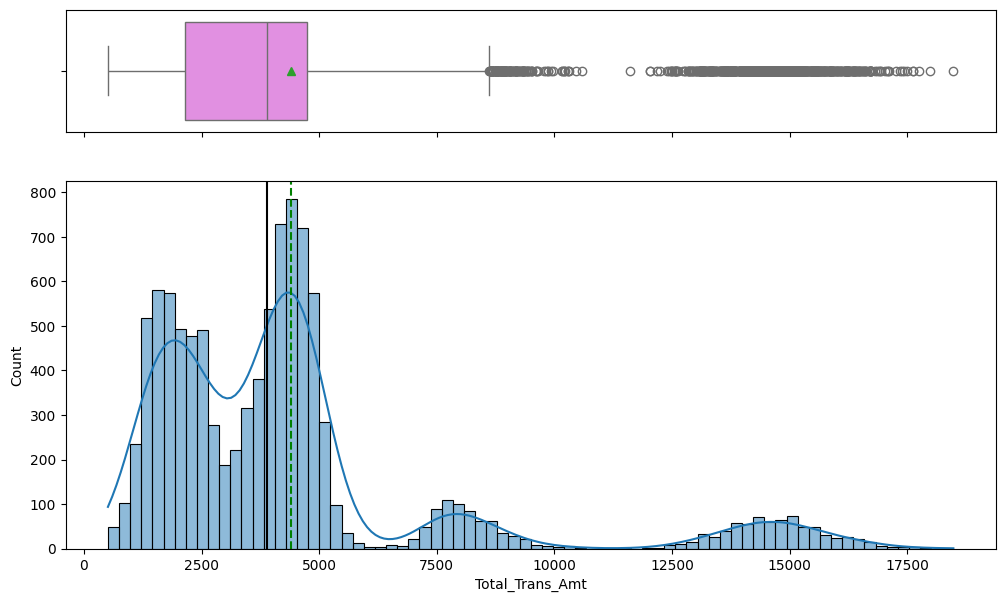

In [ ]:
histogram_boxplot(data, 'Total_Trans_Amt', kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Ct_Chng_Q4_Q1`

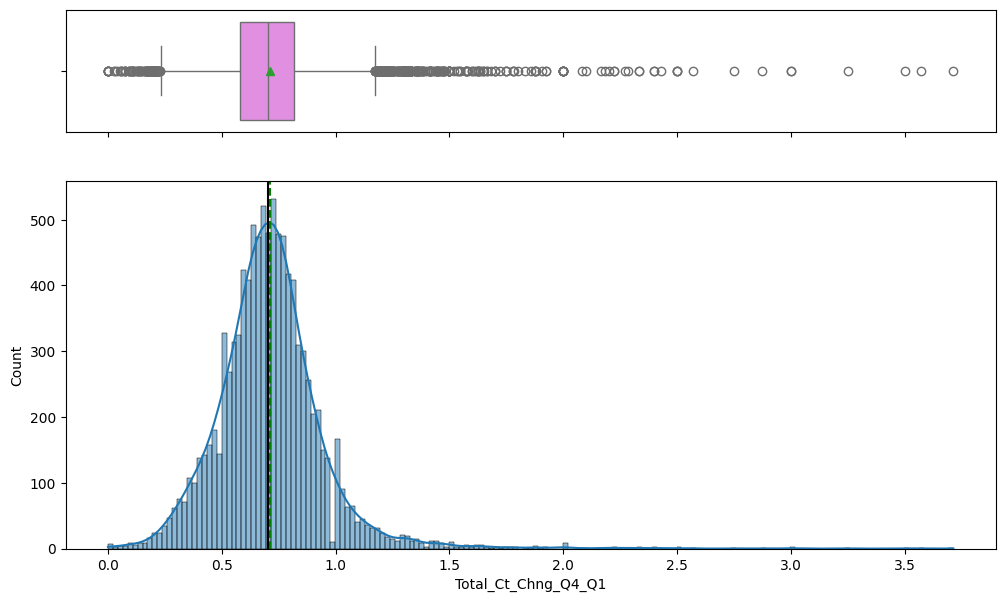

In [ ]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', kde=True)

`Avg_Utilization_Ratio`

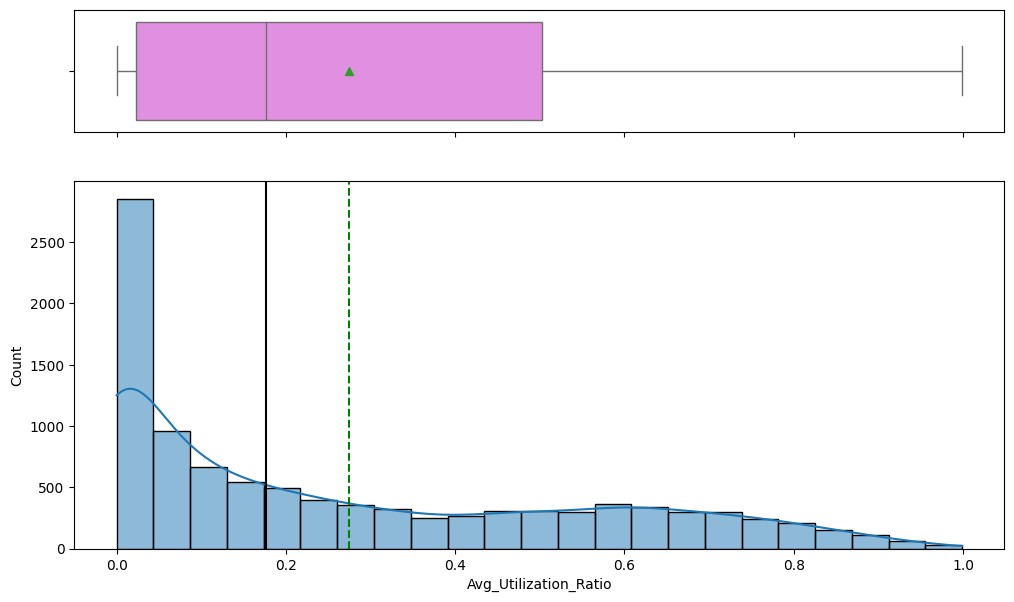

In [ ]:
histogram_boxplot(data, 'Avg_Utilization_Ratio', kde=True)

`Dependent_count`

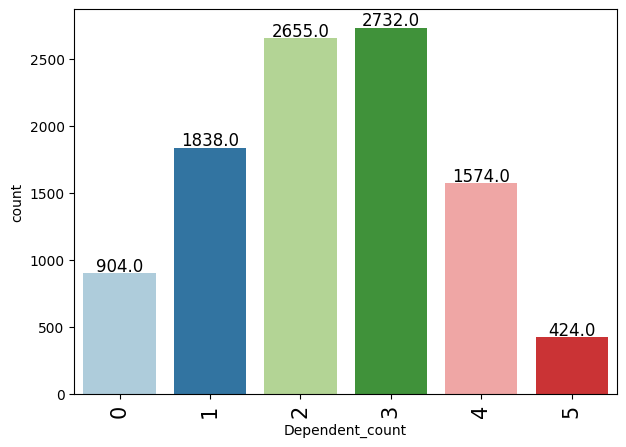

In [ ]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

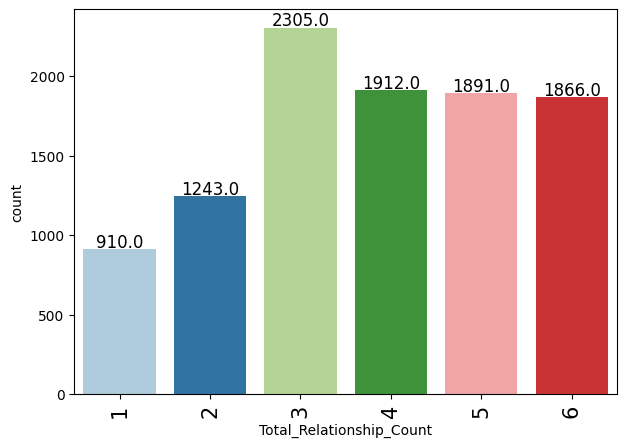

In [ ]:
labeled_barplot(data, "Total_Relationship_Count") ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

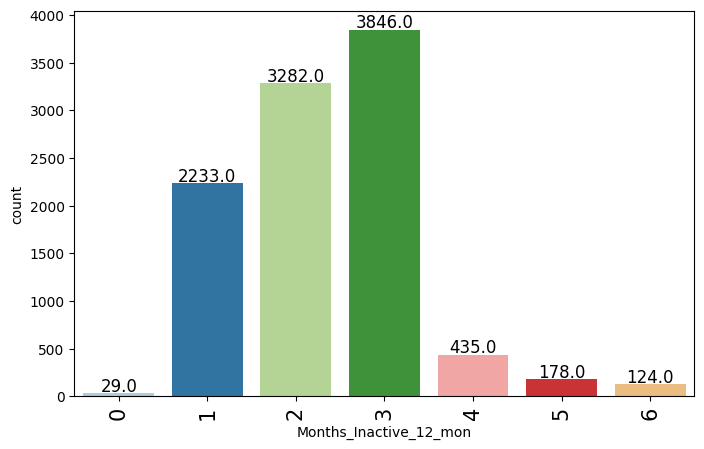

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon") ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

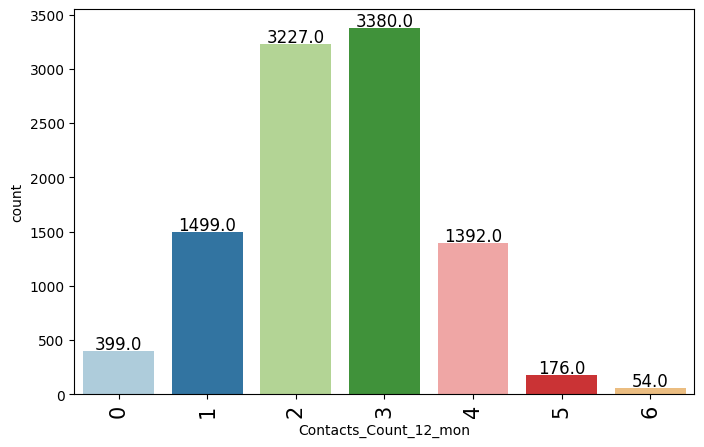

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon") ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

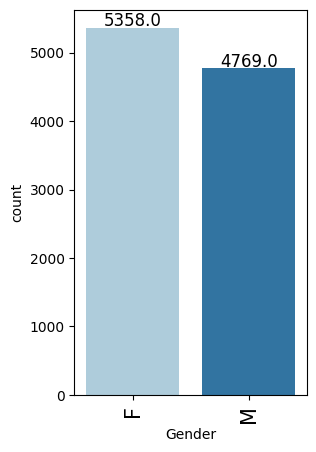

In [ ]:
labeled_barplot(data, "Gender") ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

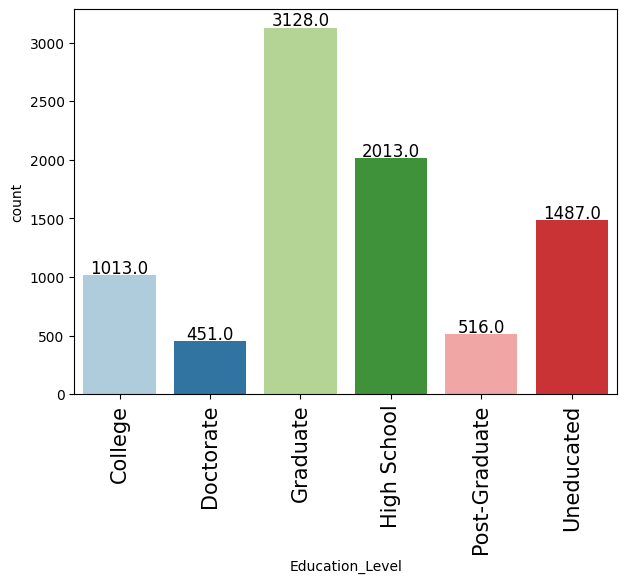

In [ ]:
labeled_barplot(data, "Education_Level") ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

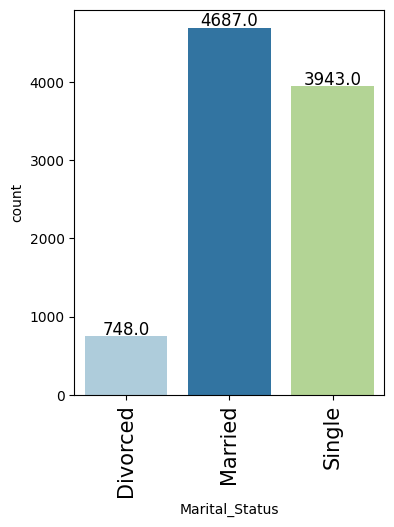

In [ ]:
labeled_barplot(data, "Marital_Status") ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

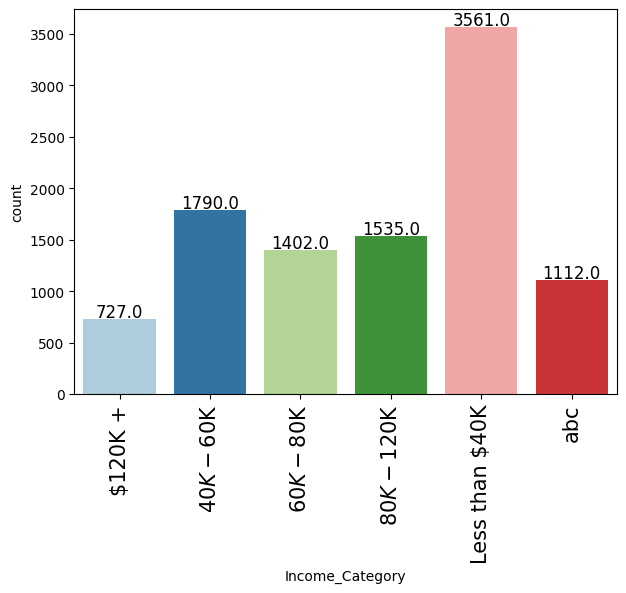

In [ ]:
labeled_barplot(data, "Income_Category") ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

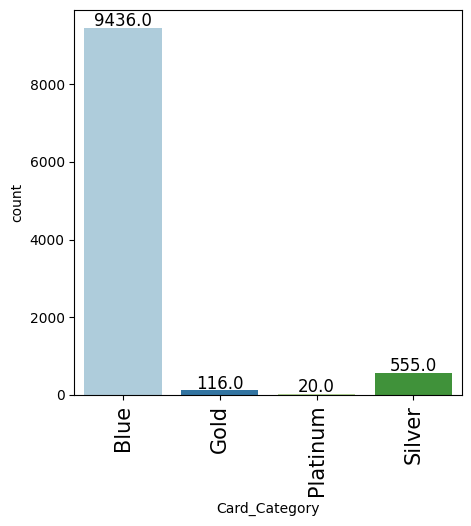

In [ ]:
labeled_barplot(data, "Card_Category") ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

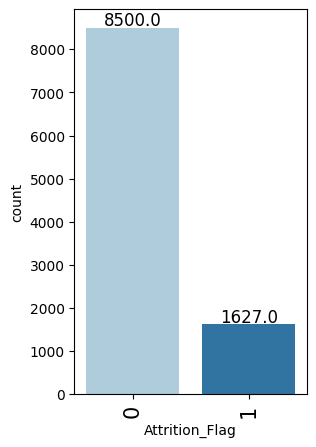

In [ ]:
labeled_barplot(data, "Attrition_Flag") ## Complete the code to create labeled_barplot for 'Attrition_Flag'

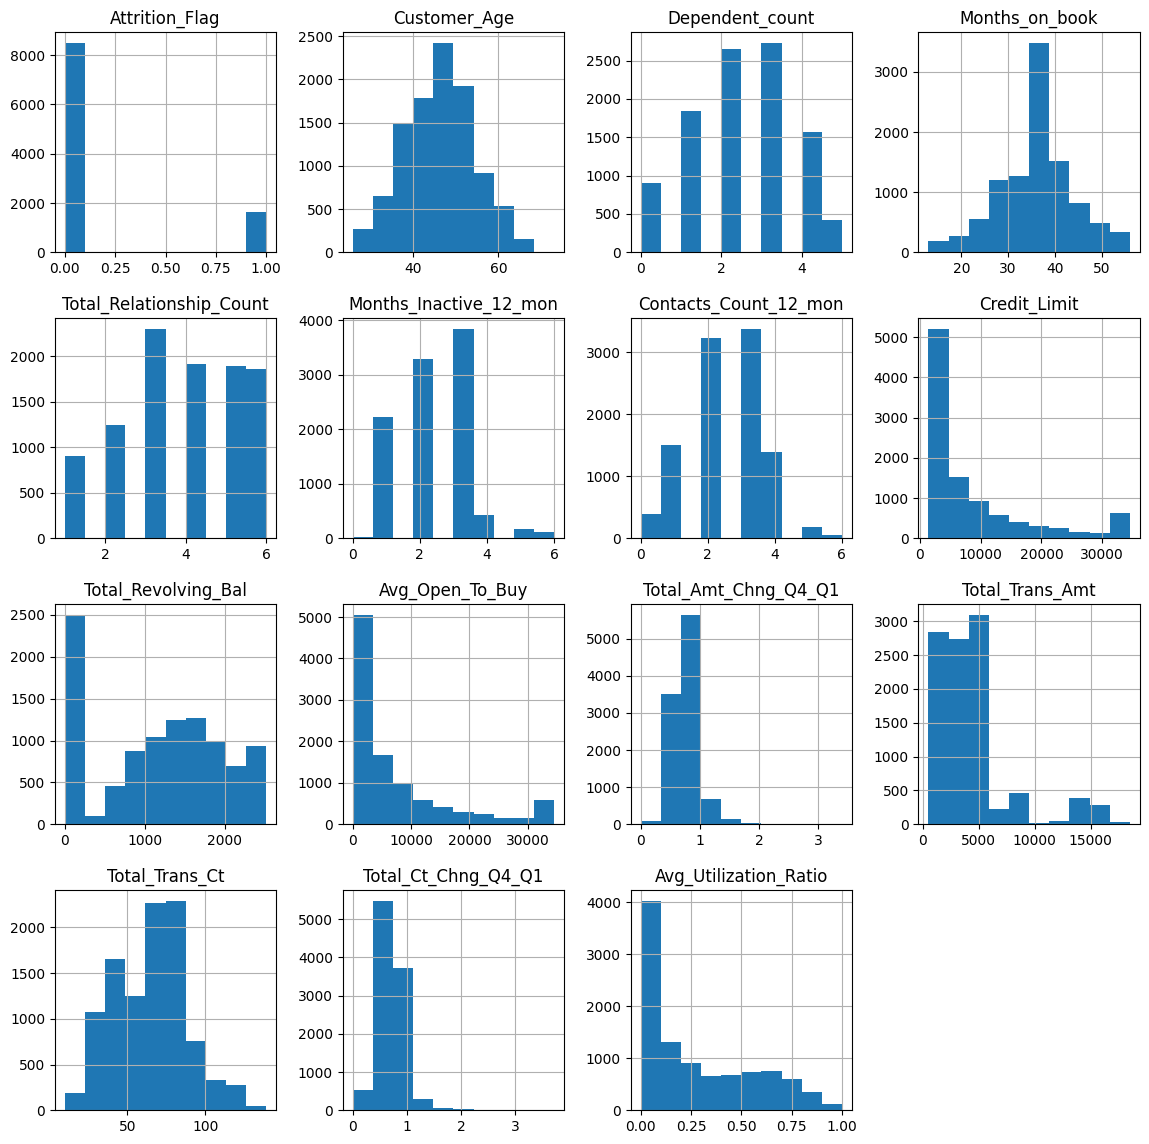

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

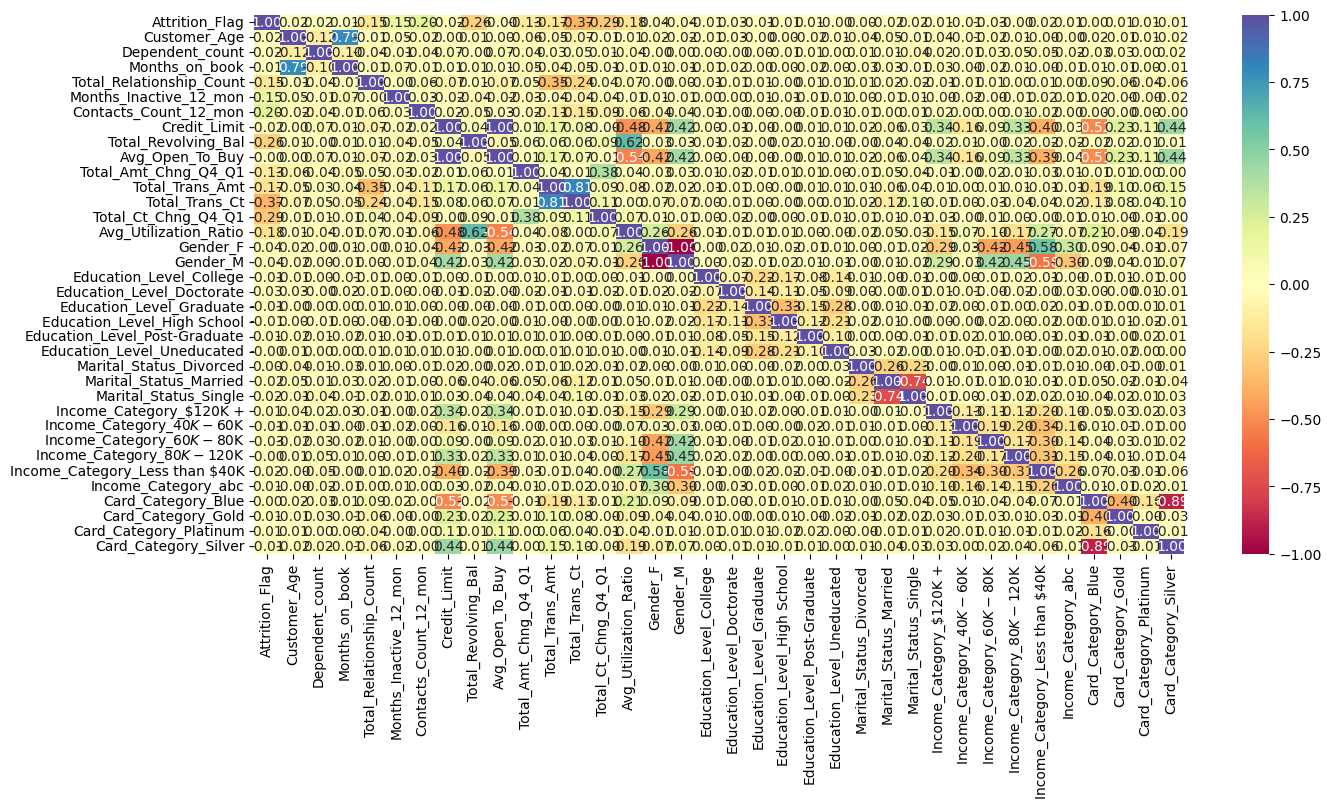

In [ ]:
# Code is fixed, did not work with original syntax. Columns need to be in same numerical format

# Convert categorical columns to numeric using one-hot encoding
numeric_data = pd.get_dummies(data)

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

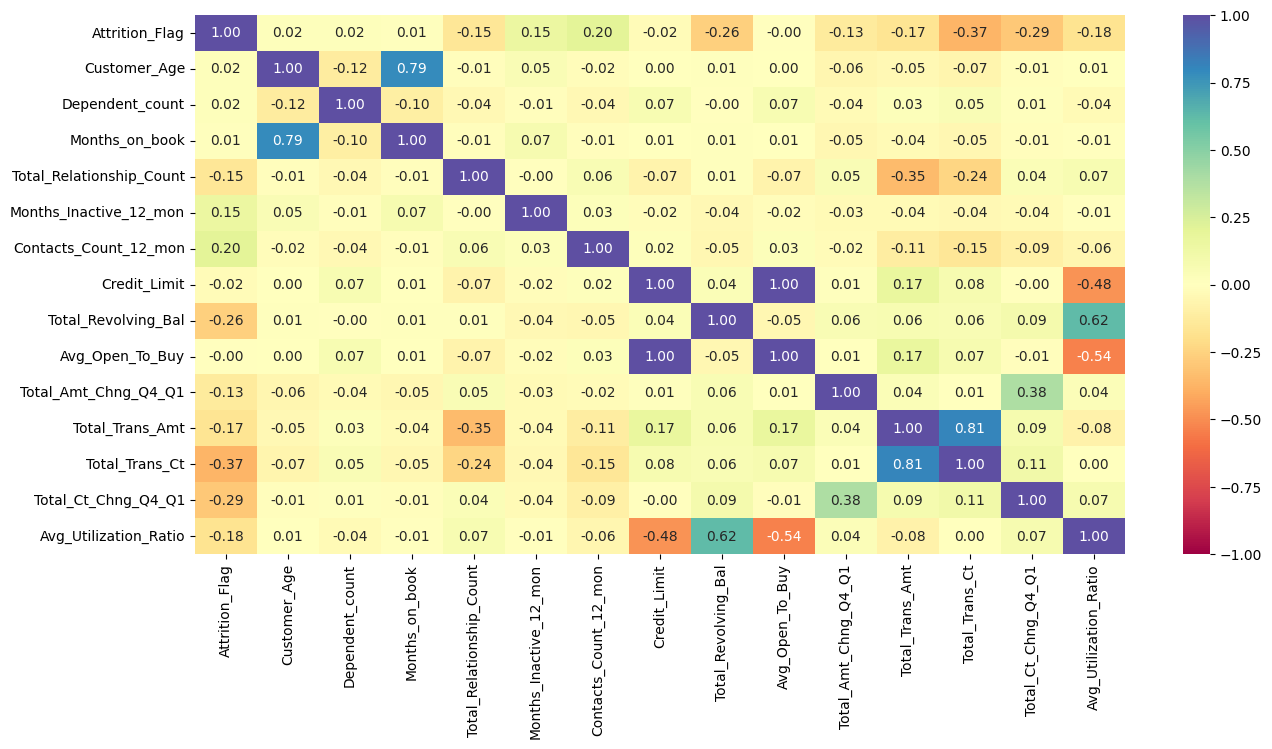

In [ ]:
# Show correlations for only numerical columns

# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


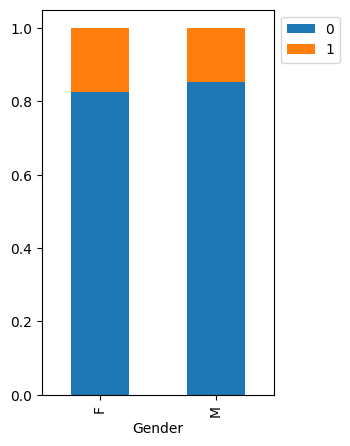

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


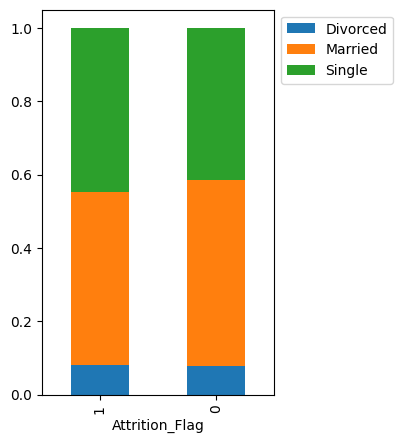

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Marital_Status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                              
All                 1013        451      3128         2013            516   
0                    859        356      2641         1707            424   
1                    154         95       487          306             92   

Education_Level  Uneducated   All  
Attrition_Flag                     
All                    1487  8608  
0                      1250  7237  
1                       237  1371  
------------------------------------------------------------------------------------------------------------------------


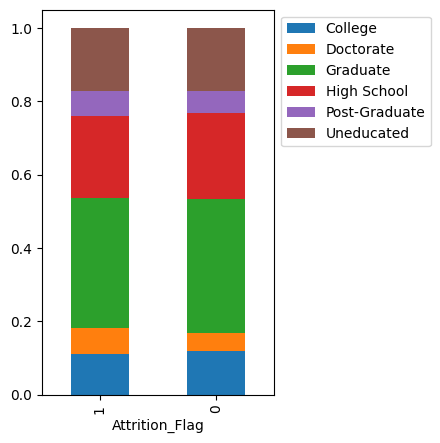

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Education_Level") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


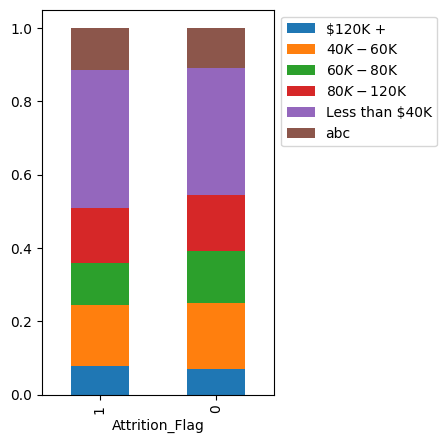

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


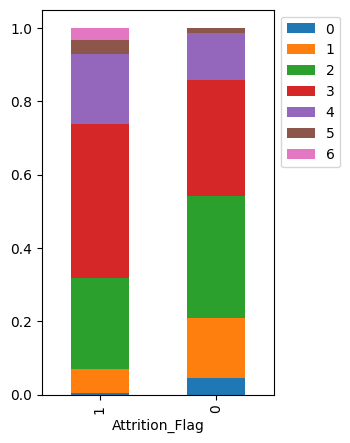

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


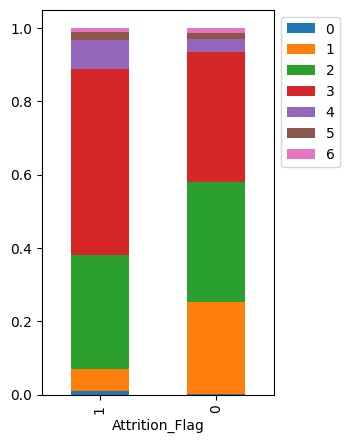

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


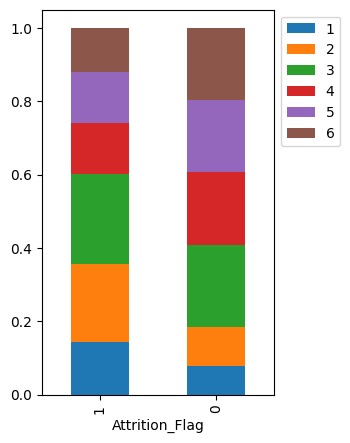

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


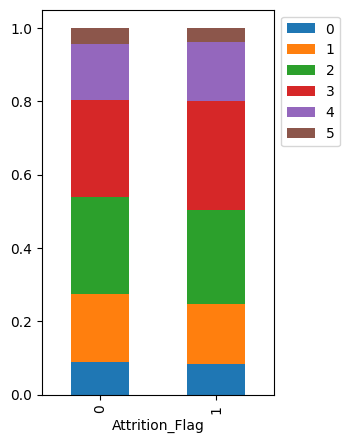

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

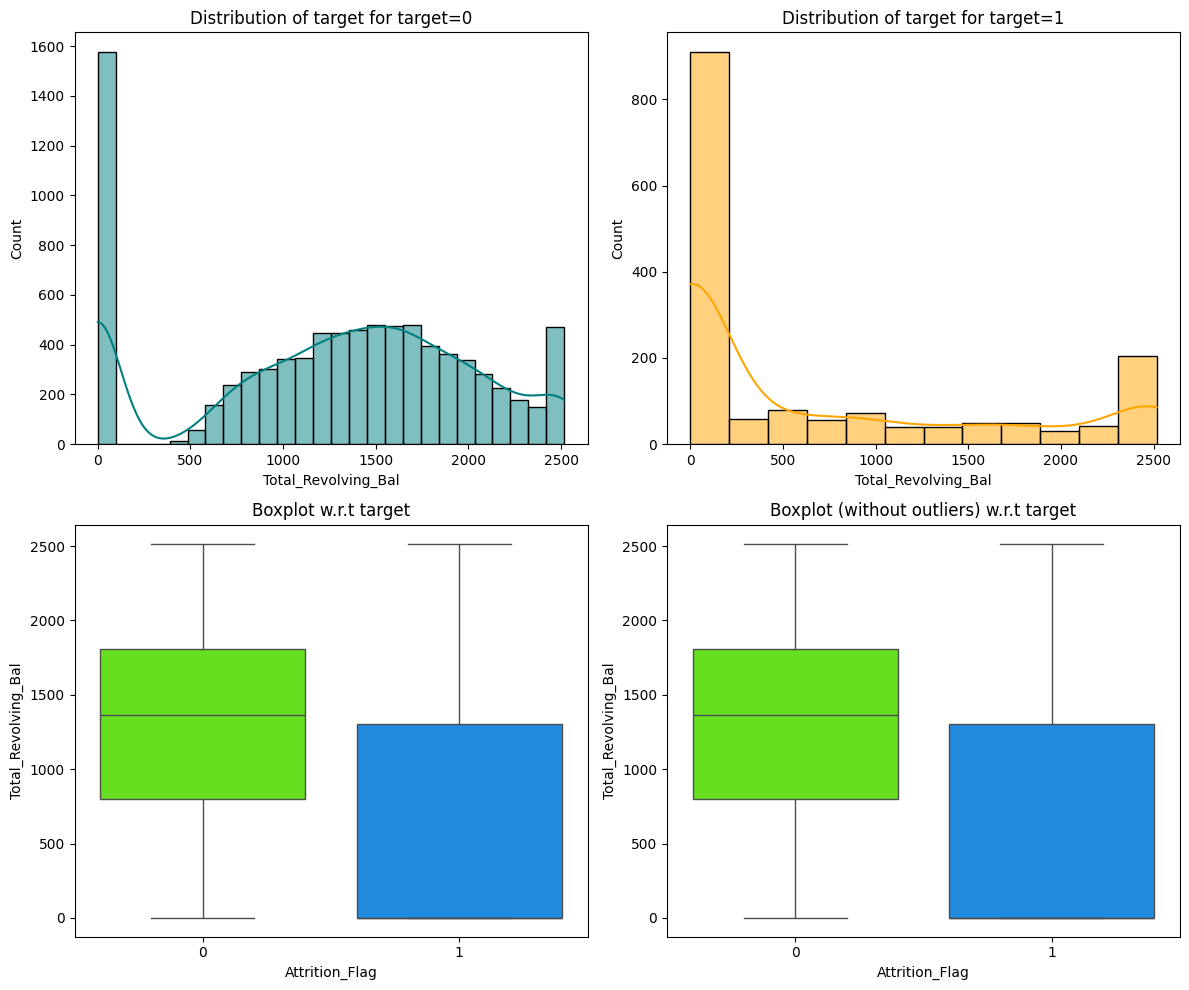

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

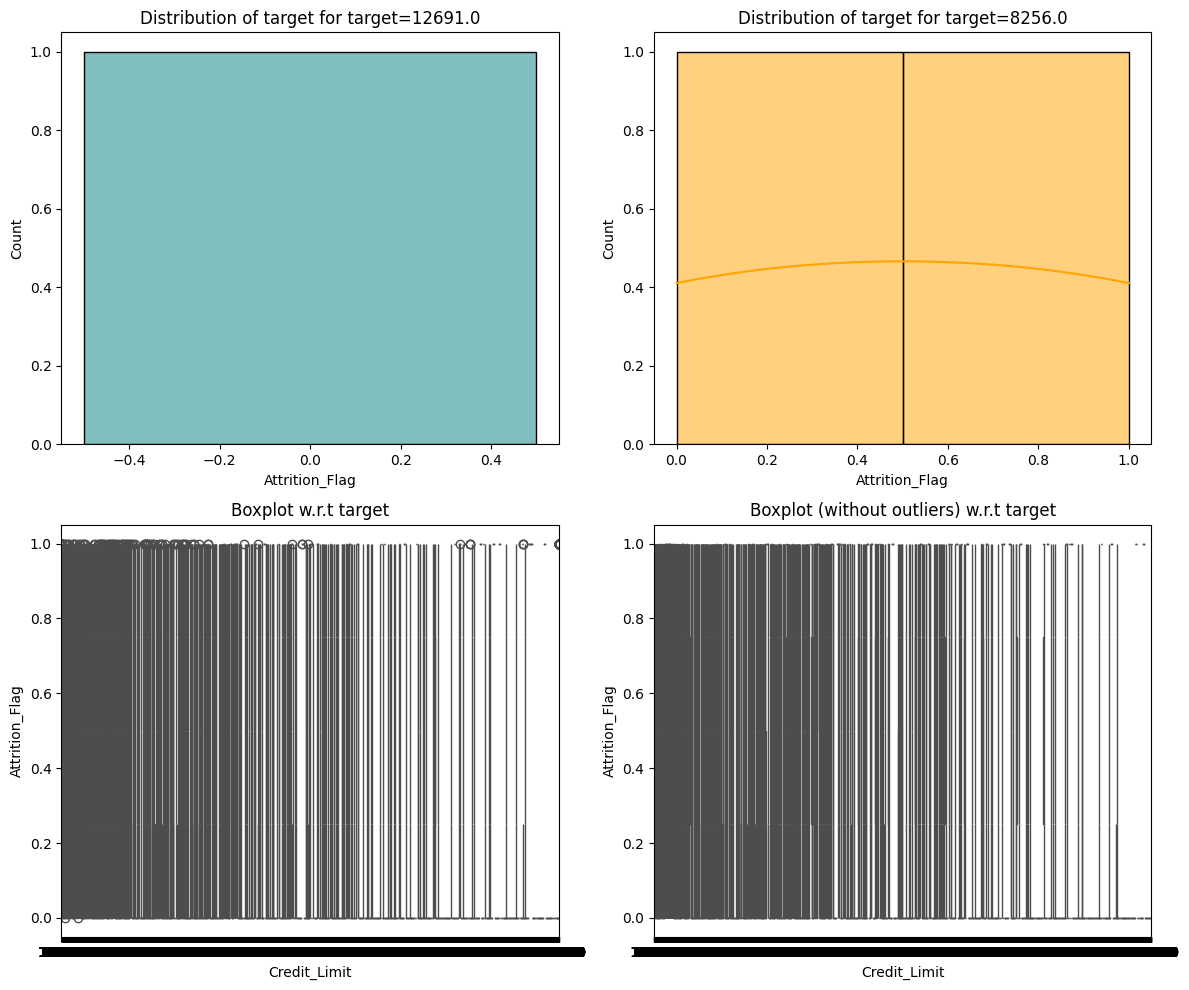

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Credit_Limit") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

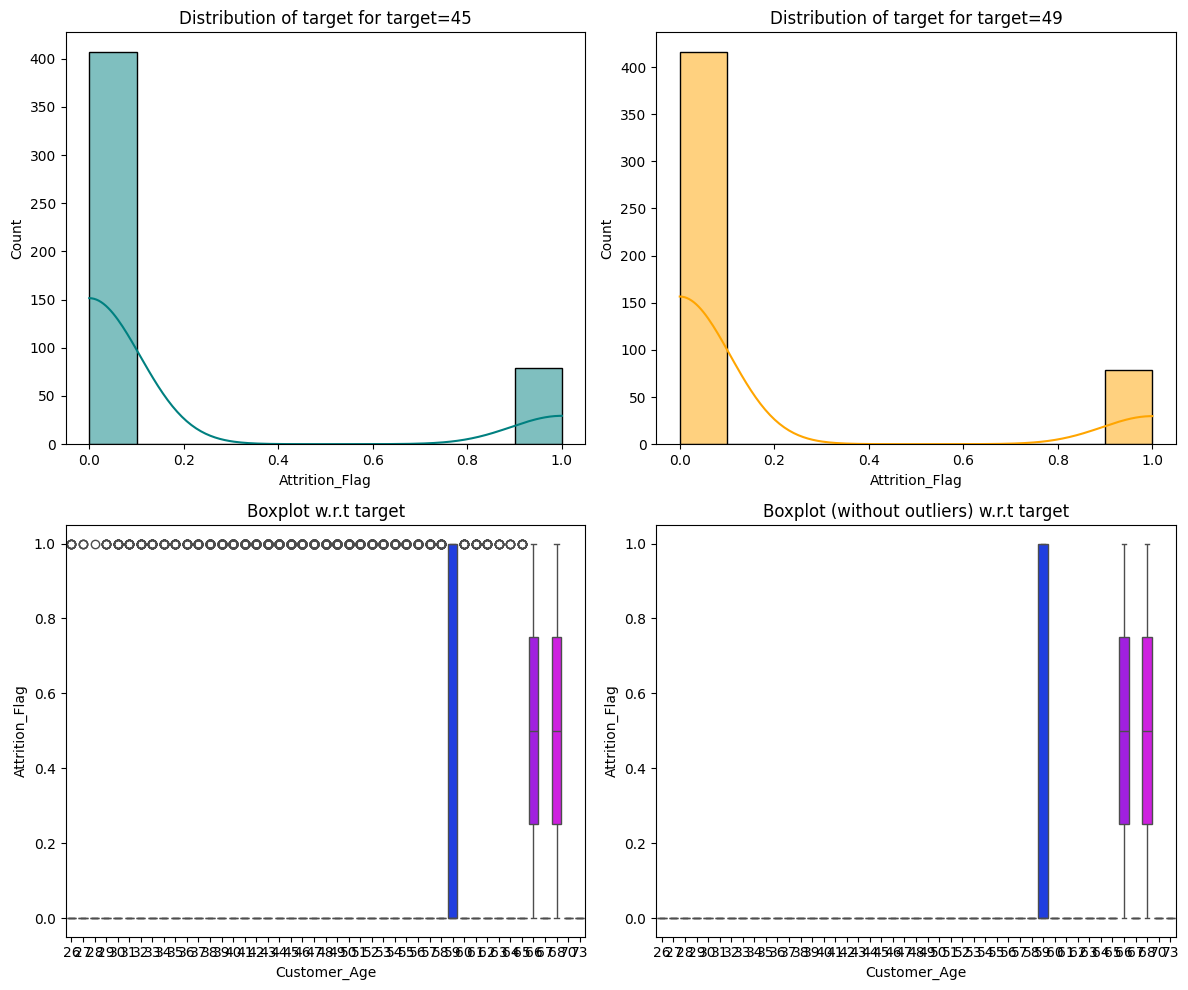

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Customer_Age") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

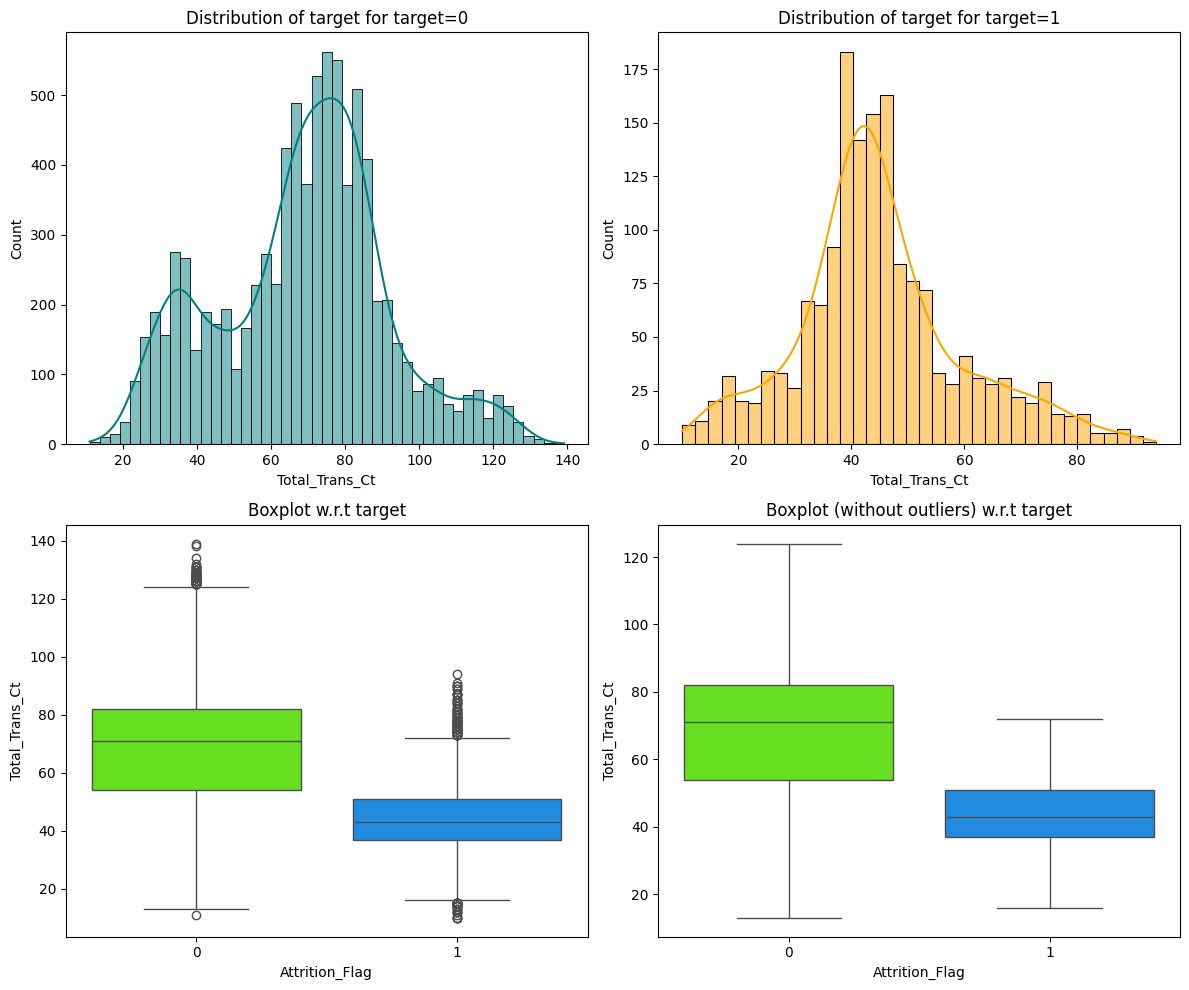

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

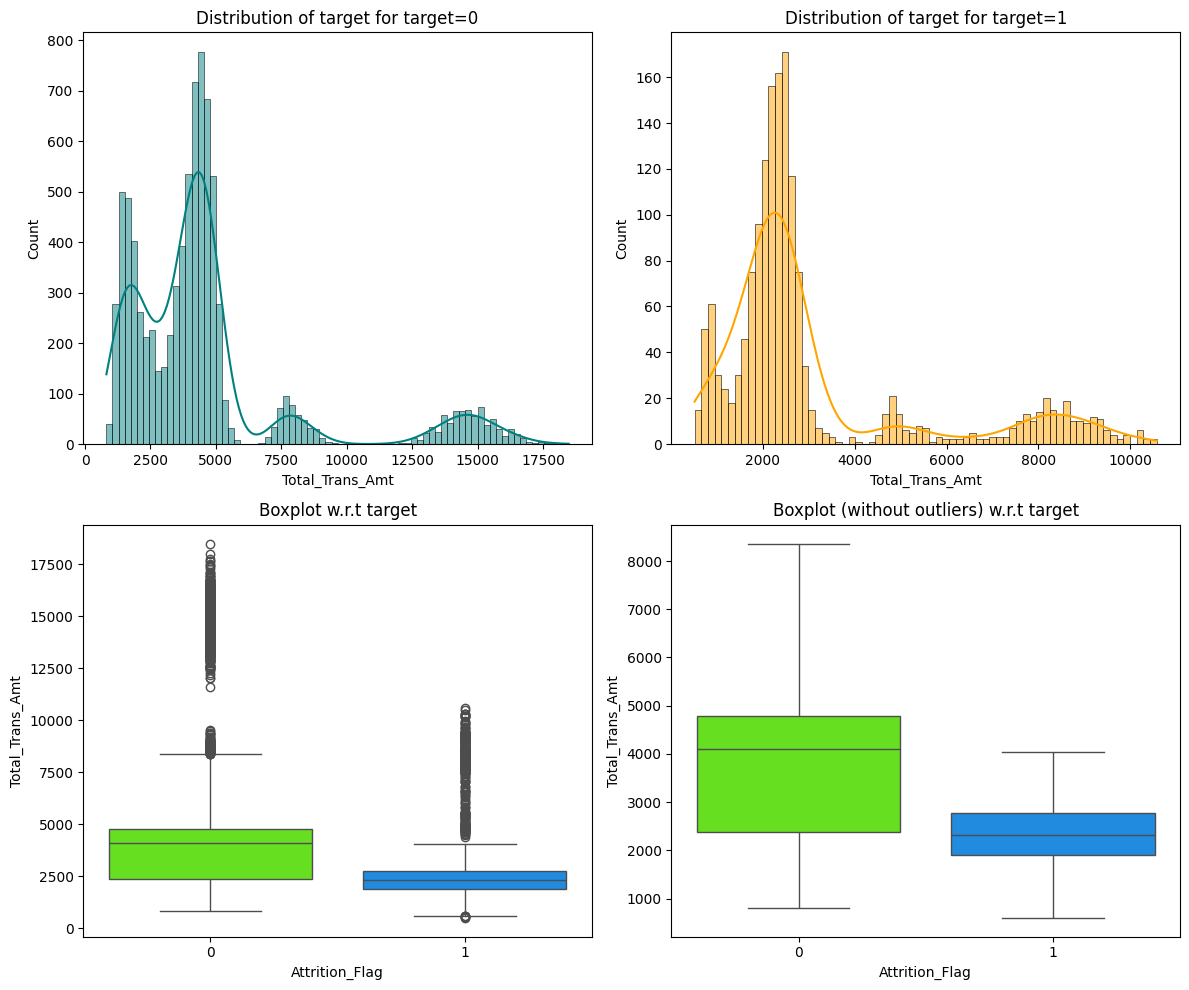

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

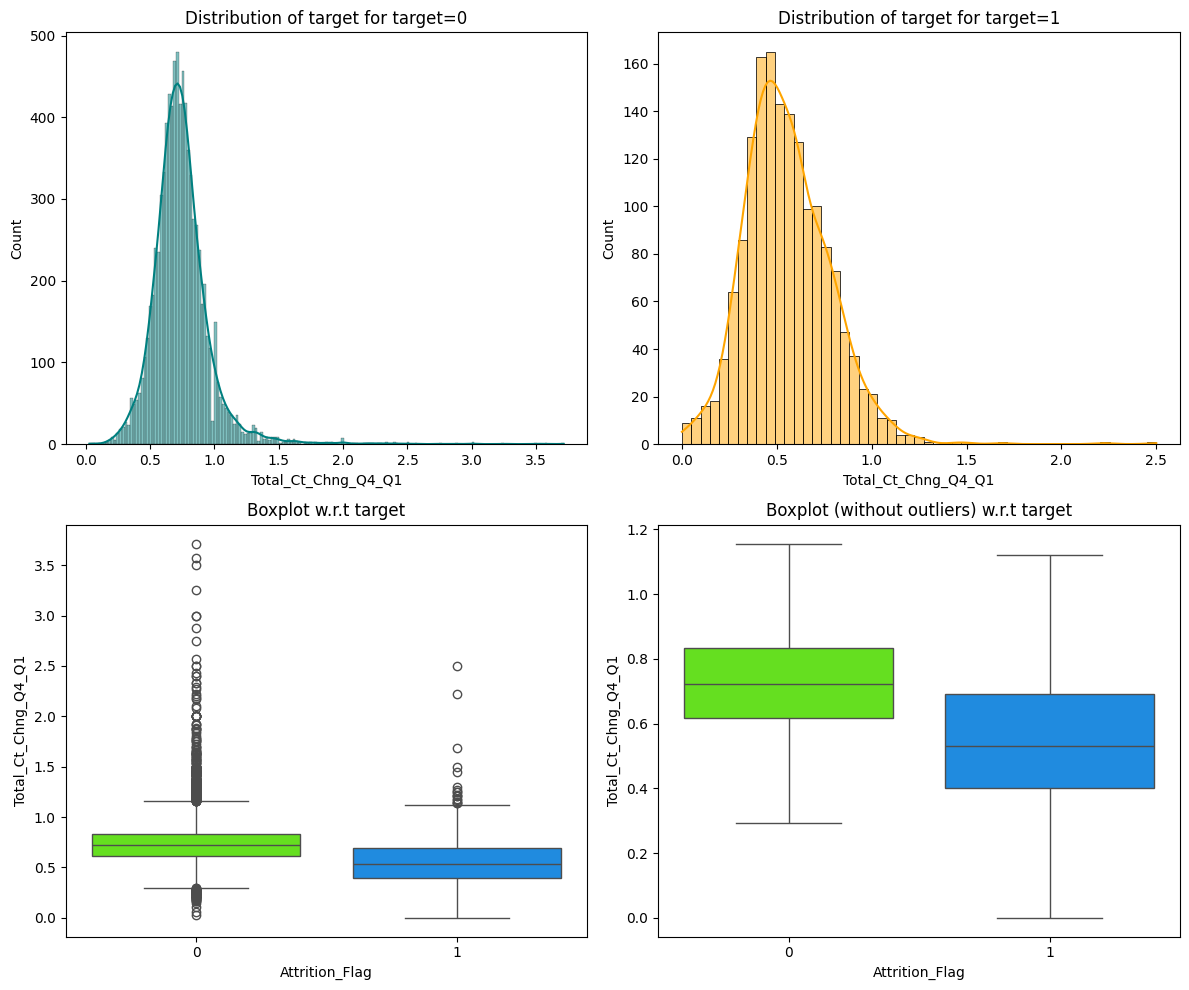

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

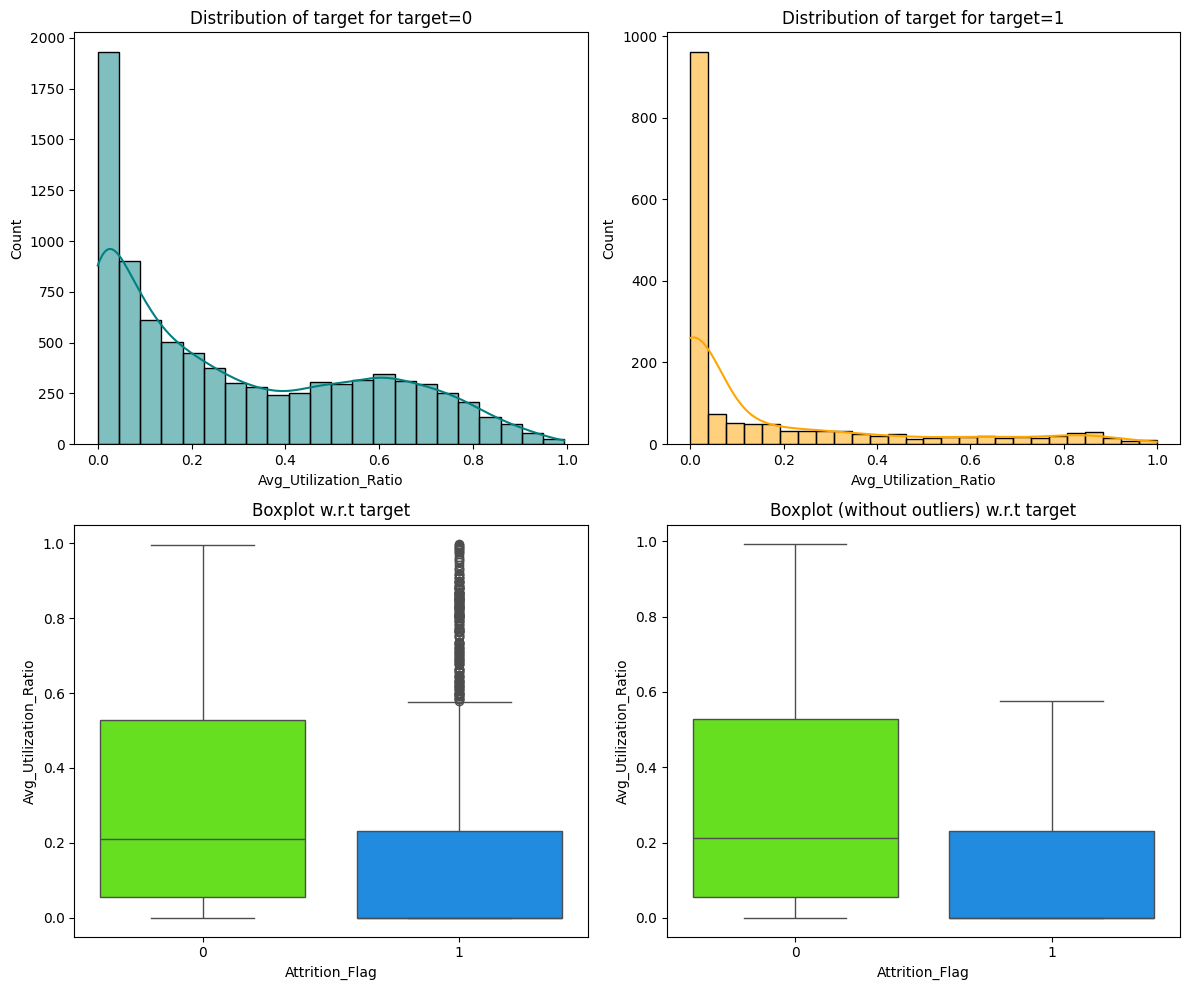

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

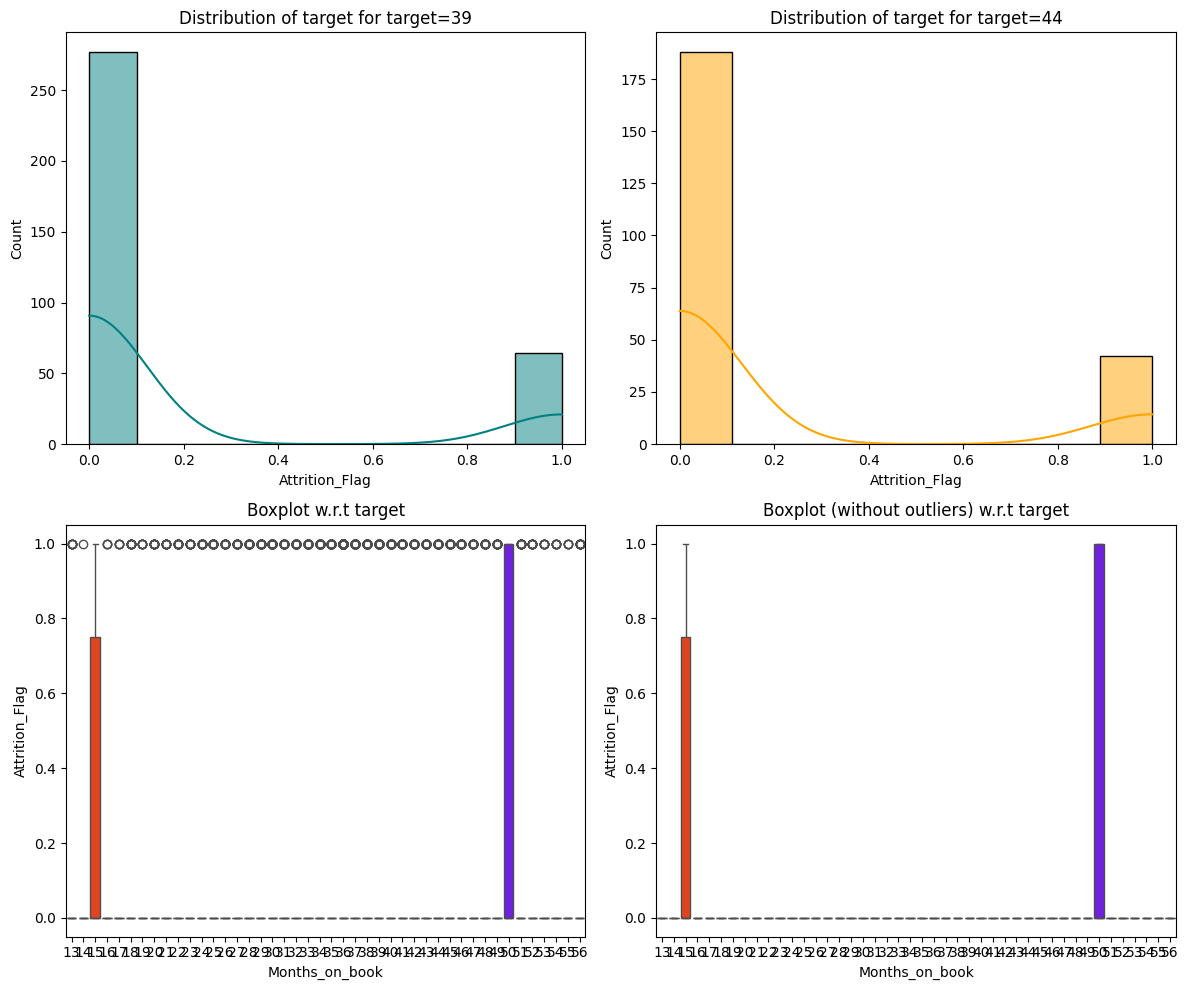

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

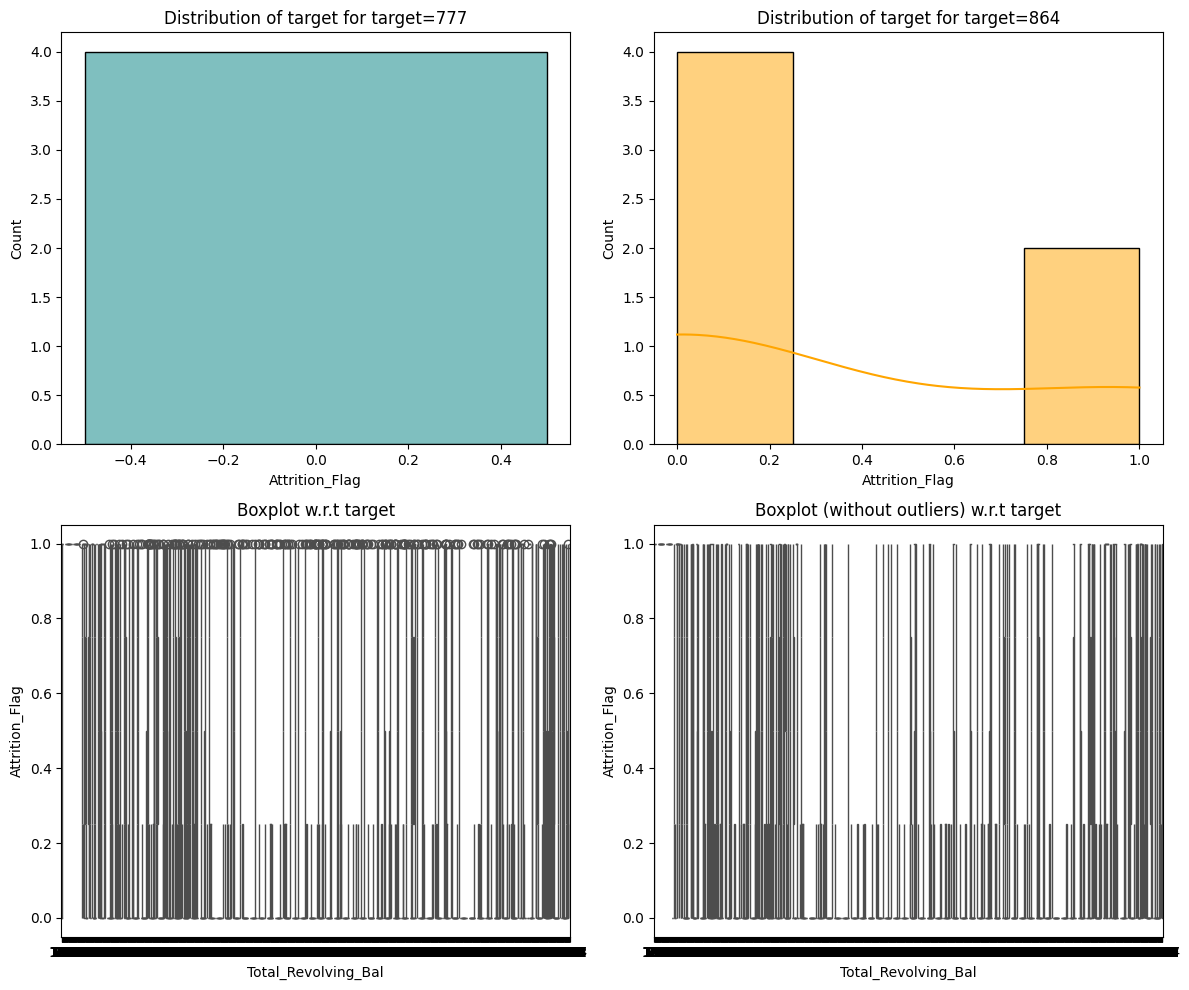

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Revolving_Bal") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

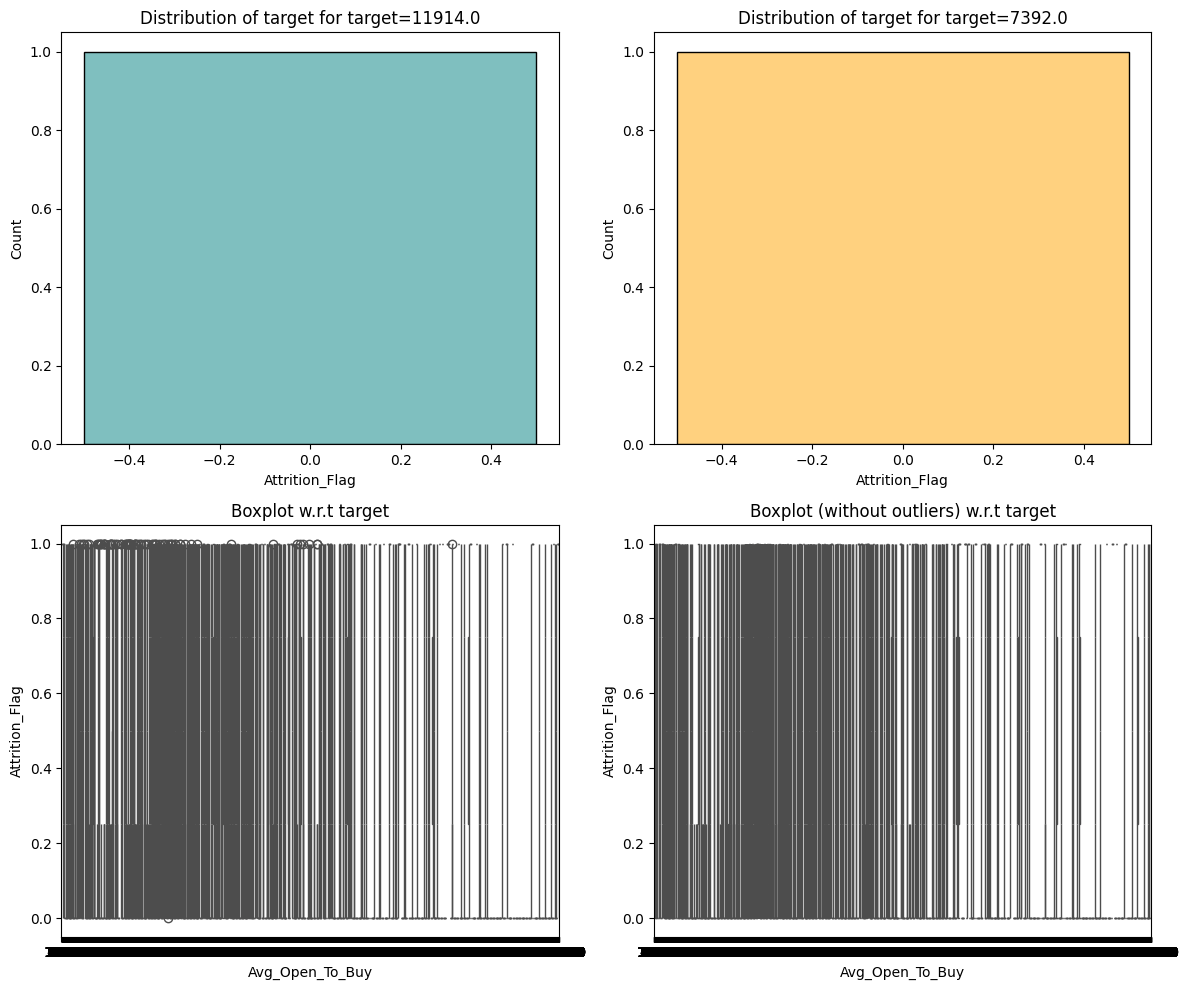

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Open_To_Buy") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [ ]:
#Q1 = data.quantile(0.25)  # To find the 25th percentile
#Q3 = data.quantile(0.75)  # To find the 75th percentile

#IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
#lower = (Q1 - 1.5 * IQR)
#upper = (Q3 + 1.5 * IQR)


# Select only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate the 25th and 75th percentiles
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower bounds for outliers:\n", lower)
print("Upper bounds for outliers:\n", upper)

# To identify outliers, you can use the following approach:
outliers = ((numeric_data < lower) | (numeric_data > upper)).sum()
print("Number of outliers in each column:\n", outliers)


Lower bounds for outliers:
 Attrition_Flag                  0.000
Customer_Age                   24.500
Dependent_count                -2.000
Months_on_book                 17.500
Total_Relationship_Count        0.000
Months_Inactive_12_mon          0.500
Contacts_Count_12_mon           0.500
Credit_Limit               -10213.750
Total_Revolving_Bal         -1778.500
Avg_Open_To_Buy            -11477.250
Total_Amt_Chng_Q4_Q1            0.289
Total_Trans_Amt             -1722.750
Total_Trans_Ct                 -9.000
Total_Ct_Chng_Q4_Q1             0.228
Avg_Utilization_Ratio          -0.697
dtype: float64
Upper bounds for outliers:
 Attrition_Flag                 0.000
Customer_Age                  68.500
Dependent_count                6.000
Months_on_book                53.500
Total_Relationship_Count       8.000
Months_Inactive_12_mon         4.500
Contacts_Count_12_mon          4.500
Credit_Limit               23836.250
Total_Revolving_Bal         3921.500
Avg_Open_To_Buy           

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
# Detect anamalous values in Income_Category column

# Assuming data1 is your DataFrame
# List unique values in the Income_Category column
unique_values = data1["Income_Category"].unique()
print("Unique values:", unique_values)

# Frequency distribution of the Income_Category column
value_counts = data1["Income_Category"].value_counts()
print("Value counts:\n", value_counts)

# Define expected categories
expected_categories = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

# Identify anomalous values
anomalous_values = set(unique_values) - set(expected_categories)
print("Anomalous values:", anomalous_values)

# Filter out rows with anomalous values
anomalous_rows = data1[data1["Income_Category"].isin(anomalous_values)]
print("Rows with anomalous values:\n", anomalous_rows)


Unique values: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Value counts:
 Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
Anomalous values: {'abc'}
Rows with anomalous values:
        Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
19                  0            45      F                2        Graduate   
28                  0            44      F                3      Uneducated   
39                  1            66      F                0       Doctorate   
44                  0            38      F                4        Graduate   
58                  0            44      F                5        Graduate   
...               ...           ...    ...              ...             ...   
10021               1            30      F                1        Graduate   
10040               1   

In [ ]:
## complete the code to replace the anomalous values with NaN

# Replace anomalous values with NaN in the Income_Category column
data1["Income_Category"].replace(list(anomalous_values), np.nan, inplace=True)

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and temporary sets in the ratio 80:20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Splitting the temporary set into validation and test sets in the ratio 75:25
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4272
M    3829
Name: count, dtype: int64
******************************
Education_Level
Graduate         3689
High School      1650
Uneducated       1183
College           796
Post-Graduate     427
Doctorate         356
Name: count, dtype: int64
******************************
Marital_Status
Married     4360
Single      3142
Divorced     599
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3718
$40K - $60K       1450
$80K - $120K      1209
$60K - $80K       1136
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7559
Silver       431
Gold          94
Platinum      17
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    271
M    236
Name: count, dtype: int64
******************************
Education_Level
Graduate         243
Uneducated        85
High School       84
College           56
Post-Graduate     22
Doctorate         17
Name: count, dtype: int64
******************************
Marital_Status
Married     273
Single      198
Divorced     36
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    252
$80K - $120K       89
$40K - $60K        75
$60K - $80K        61
$120K +            30
Name: count, dtype: int64
******************************
Card_Category
Blue        470
Silver       34
Gold          2
Platinum      1
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4272
M    3829
Name: count, dtype: int64
******************************
Education_Level
Graduate         3689
High School      1650
Uneducated       1183
College           796
Post-Graduate     427
Doctorate         356
Name: count, dtype: int64
******************************
Marital_Status
Married     4360
Single      3142
Divorced     599
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3718
$40K - $60K       1450
$80K - $120K      1209
$60K - $80K       1136
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7559
Silver       431
Gold          94
Platinum      17
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
# X_train = pd.get_dummies(X_train, drop_first=True)
# X_val = '_______'  ## Complete the code to impute missing values in X_val
# X_test = '_______'  ## Complete the code to impute missing values in X_val
# print(X_train.shape, X_val.shape, X_test.shape)

# Encode categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of validation and test sets with the training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)


(8101, 29) (507, 29) (1519, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2856,36,0,24,4,3,2,2570.000,2230,340.000,0.686,1755,42,0.448,0.868,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
6515,44,3,36,5,2,3,25276.000,0,25276.000,0.849,2282,38,0.583,0.000,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
7141,46,2,30,6,3,1,11670.000,915,10755.000,0.892,4277,89,0.854,0.078,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False
632,36,2,24,3,1,3,3124.000,1593,1531.000,0.869,1652,41,0.367,0.510,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
3496,50,1,40,4,2,3,34516.000,1185,33331.000,0.725,3874,72,0.714,0.034,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))) ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9731182795698925
Random forest: 1.0
Gradient Boosting: 0.8940092165898618
AdaBoost: 0.8602150537634409
XGBoost: 1.0

Validation Performance:

Bagging: 0.7777777777777778
Random forest: 0.8024691358024691
Gradient Boosting: 0.8271604938271605
AdaBoost: 0.8148148148148148
XGBoost: 0.8641975308641975


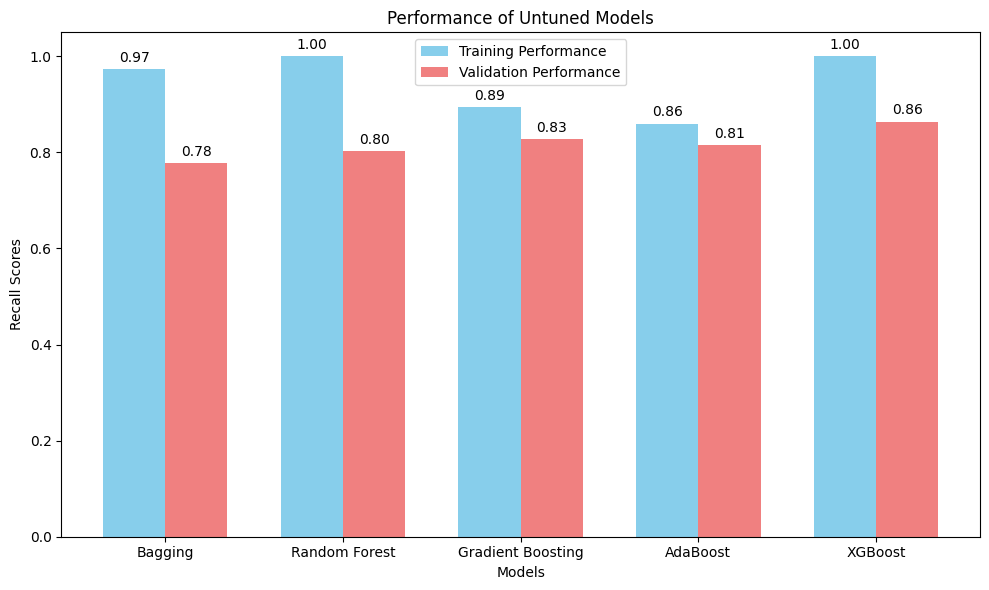

In [ ]:
#Generate chart of performance data

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
training_scores = [0.9731182795698925, 1.0, 0.8940092165898618, 0.8602150537634409, 1.0]
validation_scores = [0.7777777777777778, 0.8024691358024691, 0.8271604938271605, 0.8148148148148148, 0.8641975308641975]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Performance', color='skyblue')
rects2 = ax.bar(x + width/2, validation_scores, width, label='Validation Performance', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Recall Scores')
ax.set_title('Performance of Untuned Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Labeling the bars
def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))) ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
Gradient Boosting: 0.9764671275187528
AdaBoost: 0.9667598176202382
XGBoost: 1.0

Validation Performance:

Bagging: 0.8518518518518519
Random forest: 0.8765432098765432
Gradient Boosting: 0.8888888888888888
AdaBoost: 0.8518518518518519
XGBoost: 0.8641975308641975


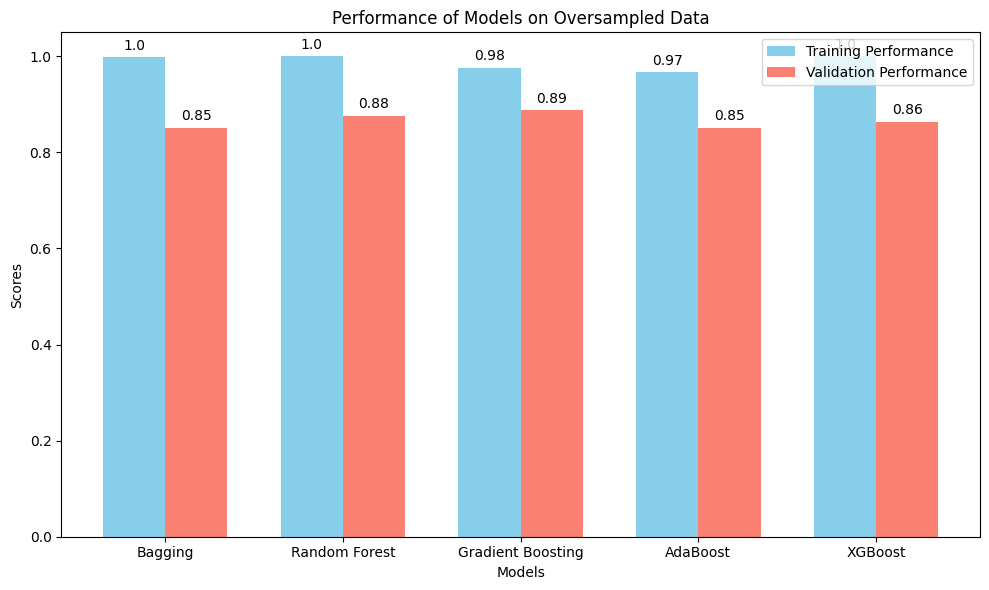

In [ ]:
#Generate chart for oversampled data performance outputs

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
train_scores = [0.998529195469922, 1.0, 0.9764671275187528, 0.9667598176202382, 1.0]
val_scores = [0.8518518518518519, 0.8765432098765432, 0.8888888888888888, 0.8518518518518519, 0.8641975308641975]

x = np.arange(len(models))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Training Performance', color='skyblue')
bars2 = ax.bar(x + width/2, val_scores, width, label='Validation Performance', color='salmon')

# Adding text annotations
for bar in bars1:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance of Models on Oversampled Data')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.savefig('performance_oversampled_data.png')
plt.show()


### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))) ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9900153609831029
Random forest: 1.0
Gradient Boosting: 0.978494623655914
AdaBoost: 0.9631336405529954
XGBoost: 1.0

Validation Performance:

Bagging: 0.9259259259259259
Random forest: 0.9135802469135802
Gradient Boosting: 0.9382716049382716
AdaBoost: 0.9382716049382716
XGBoost: 0.9506172839506173


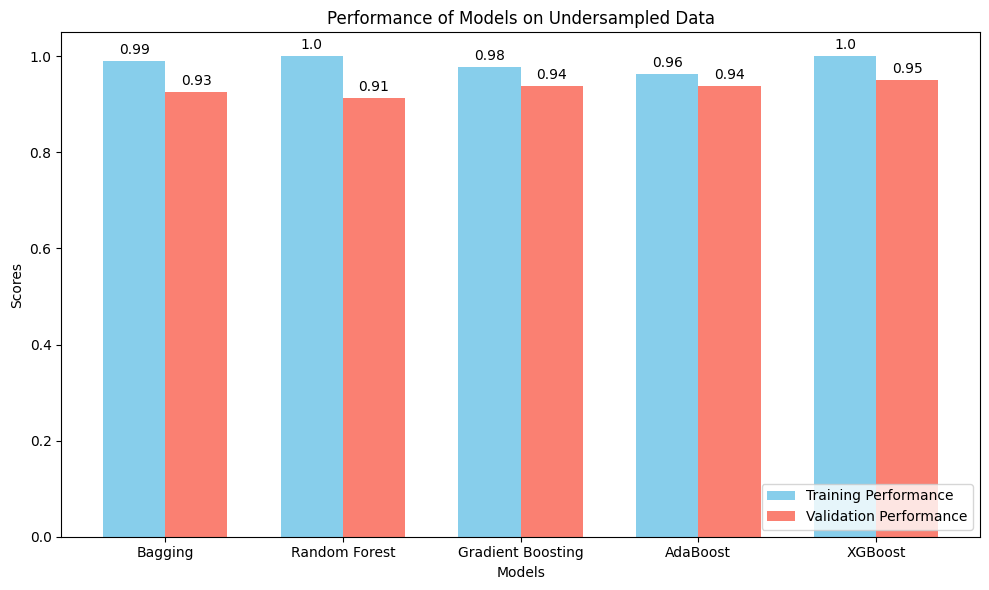

In [ ]:
#Generate chart for undersampling

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
train_scores = [0.9900153609831029, 1.0, 0.978494623655914, 0.9631336405529954, 1.0]
val_scores = [0.9259259259259259, 0.9135802469135802, 0.9382716049382716, 0.9382716049382716, 0.9506172839506173]

x = np.arange(len(models))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Training Performance', color='skyblue')
bars2 = ax.bar(x + width/2, val_scores, width, label='Validation Performance', color='salmon')

# Adding text annotations
for bar in bars1:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance of Models on Undersampled Data')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8632802829354553:
CPU times: user 5.82 s, sys: 526 ms, total: 6.34 s
Wall time: 2min 30s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate=0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train, y_train) ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train) ## Complete the code to check the performance on training set
adb_train

,Accuracy,Recall,Precision,F1
0,0.983,0.925,0.965,0.945


In [ ]:
# Check performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val) ##Checking performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.982,0.901,0.986,0.942


In [ ]:
# Check performance on test set
adb_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test) ##Checking performance on test set
adb_test

,Accuracy,Recall,Precision,F1
0,0.968,0.848,0.945,0.894


#### Tuning Ada Boost using undersampled data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Check performance on training set
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.991,0.991,0.992,0.991


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.941,0.901,0.768,0.830


In [ ]:
# Checking model's performance on test set
adb2_test = model_performance_classification_sklearn(tuned_ada2, X_test, y_test)
adb2_test

,Accuracy,Recall,Precision,F1
0,0.950,0.934,0.792,0.857


#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9592956086059534:
CPU times: user 2.83 s, sys: 361 ms, total: 3.19 s
Wall time: 1min 42s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Check performance on undersampled training set
gbm1_train = model_performance_classification_sklearn(randomized_cv.best_estimator_, X_train_un, y_train_un)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.977,0.984,0.970,0.977


In [ ]:
# Check performance on validation set
gbm1_val = model_performance_classification_sklearn(randomized_cv.best_estimator_, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.947,0.914,0.787,0.846


In [ ]:
# Checking model's performance on test set
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.947,0.934,0.778,0.849


#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8287297376952549:
CPU times: user 6.15 s, sys: 668 ms, total: 6.82 s
Wall time: 3min 49s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
# Check performance on oversampled training set
gbm2_train = model_performance_classification_sklearn(randomized_cv.best_estimator_, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.921,0.849,0.991,0.915


In [ ]:
# Check performance on validation set
gbm2_val = model_performance_classification_sklearn(randomized_cv.best_estimator_, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.968,0.815,0.985,0.892


In [ ]:
# Checking model's performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.959,0.779,0.960,0.860


#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
xgb_randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(xgb_randomized_cv.best_params_,xgb_randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9370085470085471:
CPU times: user 5.95 s, sys: 460 ms, total: 6.41 s
Wall time: 1min 34s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.1,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Check performance on original training set
xgb_train = model_performance_classification_sklearn(xgb_randomized_cv.best_estimator_, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.986,0.997,0.923,0.959


In [ ]:
# Check performance on validation set
xgb_val = model_performance_classification_sklearn(xgb_randomized_cv.best_estimator_, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.961,0.914,0.851,0.881


In [ ]:
# Check performance on test set
xgb_test = model_performance_classification_sklearn(xgb_randomized_cv.best_estimator_, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.962,0.898,0.869,0.883


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
        xgb_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.977,0.921,0.991,0.986
Recall,0.984,0.849,0.991,0.997
Precision,0.970,0.991,0.992,0.923
F1,0.977,0.915,0.991,0.959


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb2_val.T,
        xgb_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.947,0.968,0.941,0.961
Recall,0.914,0.815,0.901,0.914
Precision,0.787,0.985,0.768,0.851
F1,0.846,0.892,0.830,0.881


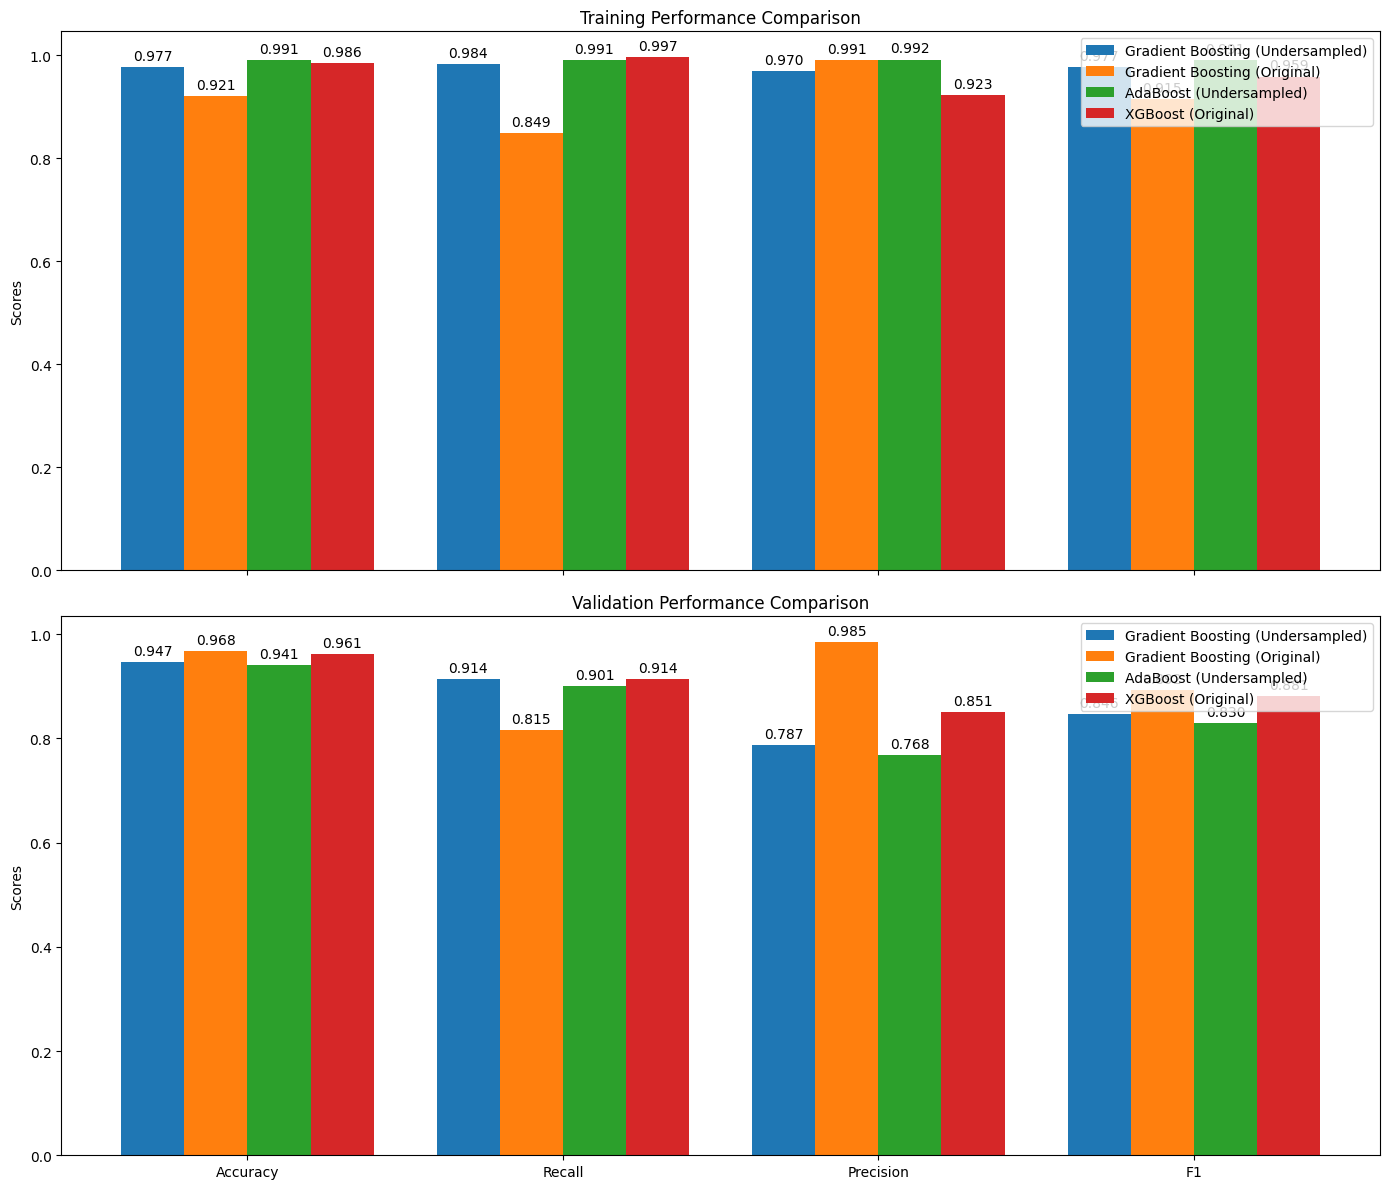

In [ ]:
#Generate charts based on the validation and training data

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Gradient Boosting (Undersampled)', 'Gradient Boosting (Original)', 'AdaBoost (Undersampled)', 'XGBoost (Original)']
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']

# Training performance data
training_data = {
    'Gradient Boosting (Undersampled)': [0.977, 0.984, 0.970, 0.977],
    'Gradient Boosting (Original)': [0.921, 0.849, 0.991, 0.915],
    'AdaBoost (Undersampled)': [0.991, 0.991, 0.992, 0.991],
    'XGBoost (Original)': [0.986, 0.997, 0.923, 0.959]
}

# Validation performance data
validation_data = {
    'Gradient Boosting (Undersampled)': [0.947, 0.914, 0.787, 0.846],
    'Gradient Boosting (Original)': [0.968, 0.815, 0.985, 0.892],
    'AdaBoost (Undersampled)': [0.941, 0.901, 0.768, 0.830],
    'XGBoost (Original)': [0.961, 0.914, 0.851, 0.881]
}

x = np.arange(len(metrics))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Training performance plot
for i, model in enumerate(models):
    ax[0].bar(x + i*width, training_data[model], width, label=model)

ax[0].set_ylabel('Scores')
ax[0].set_title('Training Performance Comparison')
ax[0].set_xticks(x + width * 1.5)
ax[0].set_xticklabels(metrics)
ax[0].legend(loc='best')

# Validation performance plot
for i, model in enumerate(models):
    ax[1].bar(x + i*width, validation_data[model], width, label=model)

ax[1].set_ylabel('Scores')
ax[1].set_title('Validation Performance Comparison')
ax[1].set_xticks(x + width * 1.5)
ax[1].set_xticklabels(metrics)
ax[1].legend(loc='best')

# Labeling the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for rect in ax[0].patches:
    autolabel([rect], ax[0])

for rect in ax[1].patches:
    autolabel([rect], ax[1])

fig.tight_layout()

plt.show()


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Test performance comparison
models_test_comp_df = pd.concat(
    [
        gbm1_test.T,
        gbm2_test.T,
        adb2_test.T,
        xgb_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Original data",
]
print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,XGBoost trained with Original data
Accuracy,0.947,0.959,0.950,0.962
Recall,0.934,0.779,0.934,0.898
Precision,0.778,0.960,0.792,0.869
F1,0.849,0.860,0.857,0.883


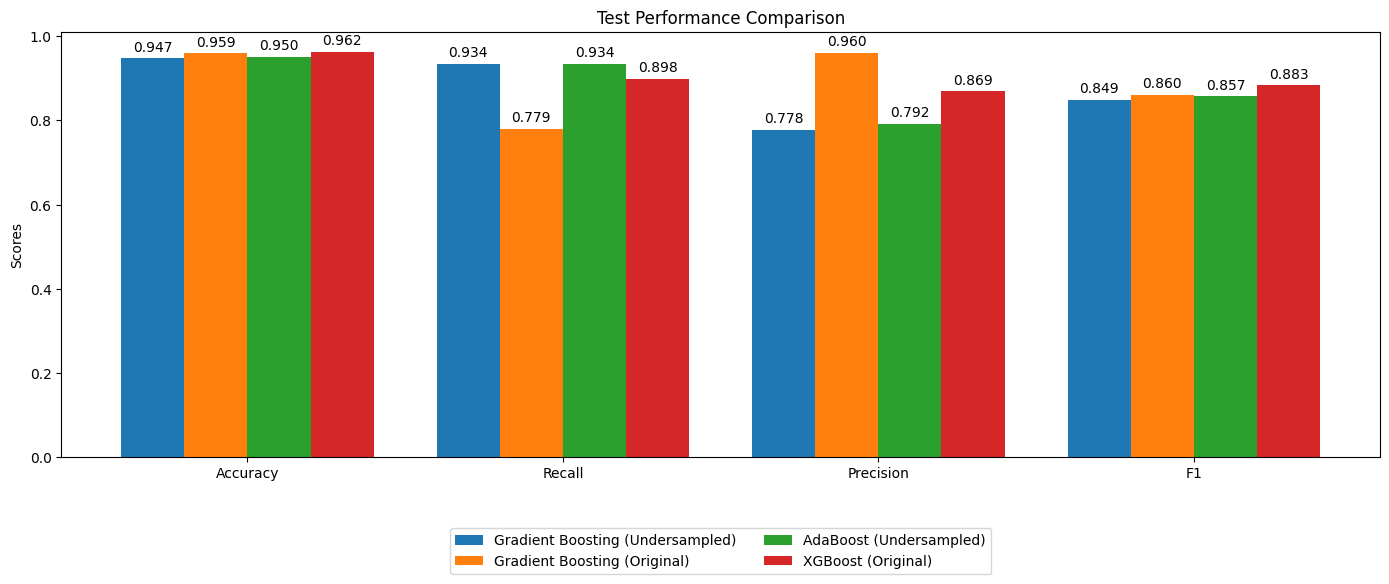

In [ ]:
# Create test data performance chart

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Gradient Boosting (Undersampled)', 'Gradient Boosting (Original)', 'AdaBoost (Undersampled)', 'XGBoost (Original)']
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']

# Test performance data
test_data = {
    'Gradient Boosting (Undersampled)': [0.947, 0.934, 0.778, 0.849],
    'Gradient Boosting (Original)': [0.959, 0.779, 0.960, 0.860],
    'AdaBoost (Undersampled)': [0.950, 0.934, 0.792, 0.857],
    'XGBoost (Original)': [0.962, 0.898, 0.869, 0.883]
}

x = np.arange(len(metrics))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(14, 6))

# Test performance plot
for i, model in enumerate(models):
    ax.bar(x + i*width, test_data[model], width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Test Performance Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics)

# Move the legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Labeling the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for rect in ax.patches:
    autolabel([rect], ax)

fig.tight_layout()

plt.show()



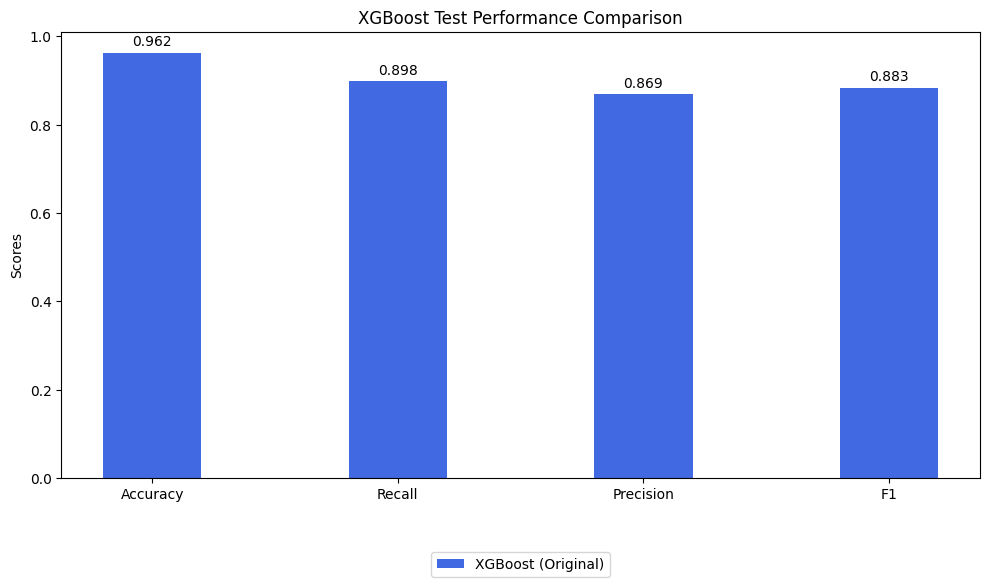

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']
xgboost_test_data = [0.962, 0.898, 0.869, 0.883]

x = np.arange(len(metrics))  # label locations
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Test performance plot for XGBoost
rects = ax.bar(x, xgboost_test_data, width, label='XGBoost (Original)', color='royalblue')

ax.set_ylabel('Scores')
ax.set_title('XGBoost Test Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Labeling the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects, ax)

fig.tight_layout()

plt.show()


### Feature Importances

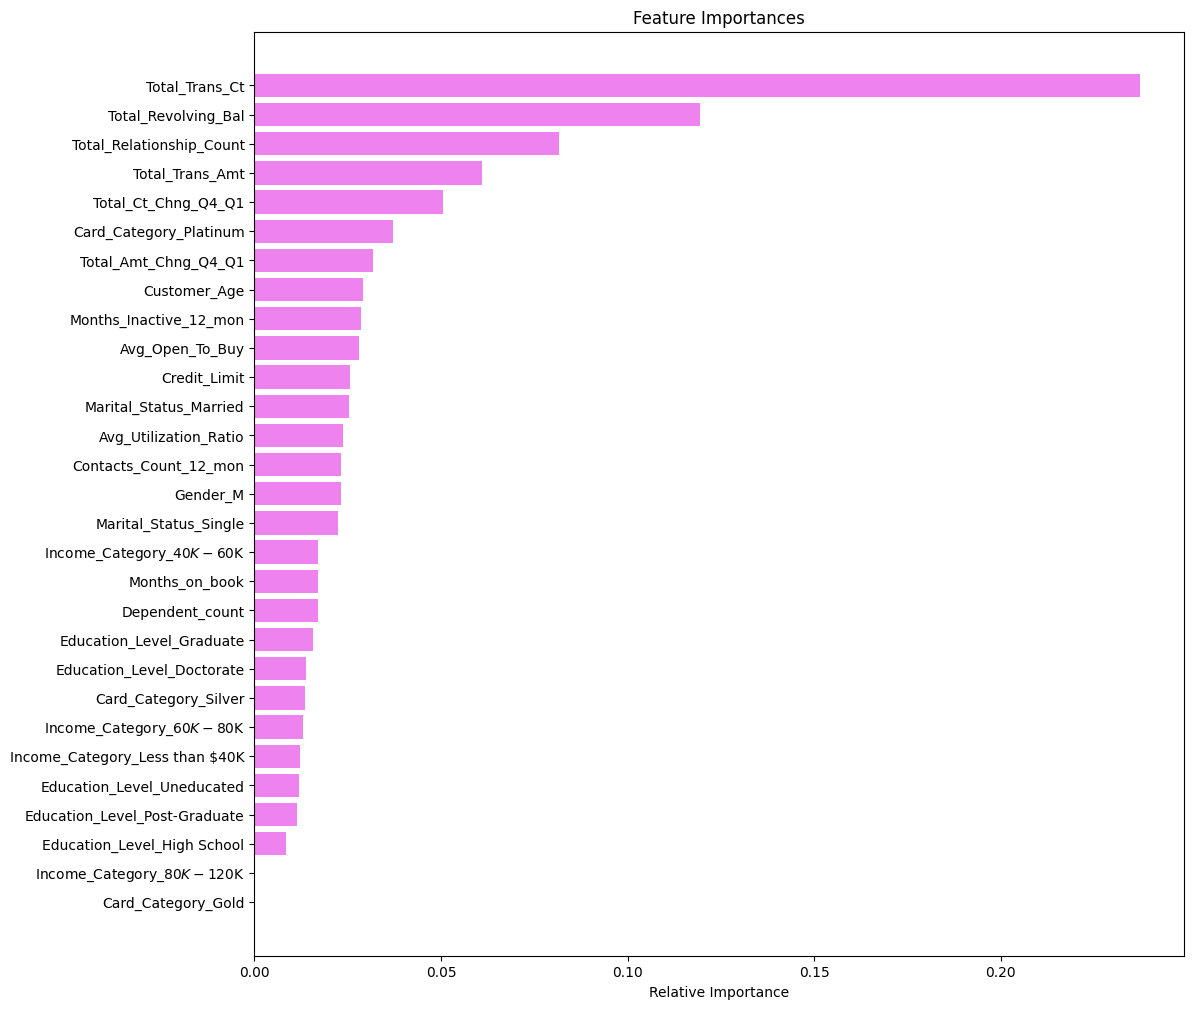

In [ ]:
# Feature importance from the best model
feature_names = X_train.columns
importances = xgb_randomized_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


Targeted Retention Strategies:

*  Focus on customers with low revolving balances, fewer products, and lower transaction amounts. Offer personalized financial products and incentives to increase their engagement and usage. Monitor customers with high inactivity and implement proactive engagement campaigns to reactivate them.

Customer Engagement:
*   Enhance customer communication strategies to ensure regular and meaningful interactions. Utilize data-driven insights to personalize communications and offers. Implement loyalty programs that reward increased product usage and longer tenure with the bank.

Product and Service Improvements:
*   Conduct surveys and focus groups with attrited customers to gain deeper insights into their reasons for leaving. Use this feedback to improve product offerings and service quality. Offer financial education and advisory services to help customers better manage their credit and maximize the benefits of their credit cards.

Continuous Monitoring and Model Updates:
*   Regularly update the predictive model with new data to ensure its accuracy and effectiveness. Implement a dashboard to monitor key metrics related to customer attrition and model performance, enabling timely interventions.List item






***